(https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Cassandra1.jpeg/800px-Cassandra1.jpeg)
## Notebook to run batch Kaissandra methods

With this notebook you can run train, test or alternated train and test methods


In [1]:
import sys
import os

this_path = os.getcwd()
path = '\\'.join(this_path.split('\\')[:-1])+'\\'
if path not in sys.path:
    sys.path.insert(0, path)
    print(path+" added to python path")
else:
    print(path+" already in python path")
    
%load_ext autoreload
%autoreload 2

C:\Users\mgutierrez\root\Projects\SDC\py\kaissandra\ added to python path


In [2]:
# Import modules
import time

from kaissandra.config import configuration, retrieve_config
from kaissandra.testRNN import test_RNN
from kaissandra.trainRNN import train_RNN
from kaissandra.inputs import Data, run_train_test, build_and_test, build_and_train


#%reload_ext autoreload

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Get config structure

In [3]:
params = {'config_name':'CRNN02010',
          
          'movingWindow':500,
          'nEventsPerStat':5000,
          'feature_keys_manual':[],
          'feature_keys_tsfresh':[i for i in range(37,48)]+[49,50]+[i for i in range(52,68)],
           'var_feat_keys':[i for i in range(68,93)],
          'L':1,
          'size_hidden_layer':1024,
          'if_build_IO':True,
          'from_stats_file':False,
          'IDweights':'WRNN02010',
          'inverse_load':True,
          
          'IDresults':'RRNN02010',
          'startFrom':-1,
          'endAt':-1,
          'save_journal':False}

config = configuration(params)

WARNING! Config values have been overwritten with entries values
Config file ../../config/CRNN02010.config exists. Loaded from disk


## Build inputs/outputs and train Network

In [ ]:
build_and_train(config)

## Build inputs/outputs and test Network

In [ ]:
build_and_test(config)

## Automately train and test in alternative manner

In [4]:
# Automate train/test from variation features
if_train = True
if_test = True
its = 20
configs = [config['config_name']]

configs_list = []
# load configuration files
for config_name in configs:
    configs_list.append(retrieve_config(config_name))
# run train/test
for config in configs_list:
    # set automation-specific config fields
    config['num_epochs'] = 1
    config['startFrom'] = -1
    config['endAt'] = -1
    run_train_test(config, its, if_train, if_test)

Config file ../../config/CRNN02010.config loaded from disk
Iteration 0 of 19
IDweights: WRNN02010
IDresults: RRNN02010
1 AUDCAD


OSError: Unable to open file (unable to open file: name = 'D:/SDC/py/HDF5/feats_var/AUDCAD_feats_var_mW500_nE5000.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
config['assets']=[1,2,3,4,7,8,10,11,12,13,14,15,16,17,19,27,28,29,30,31,32]

In [7]:
from kaissandra.RNN import modelRNN

data=Data(movingWindow=config['movingWindow'],
              nEventsPerStat=config['nEventsPerStat'],
              lB=config['lB'], 
              dateTest=config['dateTest'],
              assets=config['assets'],
              channels=config['channels'],
              max_var=config['max_var'],
              feature_keys_manual=config['feature_keys_manual'],
              feature_keys_tsfresh=config['feature_keys_tsfresh'],
              var_feat_keys=config['var_feat_keys'])
    
model=modelRNN(data,
                   size_hidden_layer=config['size_hidden_layer'],
                   L=config['L'],
                   size_output_layer=config['size_output_layer'],
                   keep_prob_dropout=config['keep_prob_dropout'],
                   miniBatchSize=config['miniBatchSize'],
                   outputGain=config['outputGain'],
                   commonY=config['commonY'],
                   lR0=config['lR0'],
                   num_epochs=config['num_epochs'])
print(data.feature_keys_manual)
print(len(data.feature_keys_tsfresh)+len(data.var_feat_keys))
print(len(data.var_feat_keys))
print(data.n_feats_tsfresh+len(data.var_feat_keys))
print(data.nFeatures)

[]
54
25
99
99


In [11]:
# test individual assets
assets = [16,17,27,29,30,32]
for asset in assets:
    ass_name = Data().AllAssets[str(asset)]
    try:
        config = configuration({'config_name':'C287INVO_'+ass_name,
                               'assets':[asset],
                               'IDresults':'C287INVO_'+ass_name})
    except OSError:
        config = retrieve_config('C287INVO_'+ass_name)
    test_RNN(config)

Config file ../config/C287INVO_USDCAD.config loaded from disk
IDresults: C287INVO_USDCAD
INFO:tensorflow:Restoring parameters from ../RNN/weights/000287INVO/000007/000007
Parameters loaded. Epoch 7
Epoch 7 of 13. Getting output...
Chunck 1 of 1
Getting results
Epoch = 7. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 4.5608315, J_train = 4.2515653775989675, Accuracy=0.6803612704391747
RD = 836 NZ = 1561 NZA = 2537 pNZ = 1.336% pNZA = 2.172% AD = 53.56% ADA = 32.95% NO = 329 GSP = 56.84% NSP = 48.33%
SI2 = -32.95 SI = -21.95 eGROI = 1.25% eROI = -2.78% eROI2 = -5.33% eROI3 = -8.62% mSpread = 0.0123%
Epoch = 7. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.6
RD = 298 NZ = 493 NZA = 818 pNZ = 0.422% pNZA = 0.700% AD = 60.45% ADA = 36.43% NO = 205 GSP = 59.02% NSP = 52.20%
SI2 = -12.75 SI = -5.75 eGROI = 3.29% eROI = 0.71% eROI2 = -0.81% eROI3 = -2.86% mSpread = 0.0126%
Epoch = 7. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.7
RD = 107 NZ = 150 NZA = 237 pNZ

C:\Users\mgutierrez\root\Projects\SDC\py\git\results2.py:619: RuntimeWarning: divide by zero encountered in double_scalars
  eROIs = eROIs+GROI-fixed_spread_ratios


Epoch = 7. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.5
RD = 327 NZ = 569 NZA = 837 pNZ = 0.487% pNZA = 0.717% AD = 57.47% ADA = 39.07% NO = 154 GSP = 55.84% NSP = 50.65%
SI2 = -12.70 SI = -6.70 eGROI = 1.58% eROI = -0.17% eROI2 = -1.50% eROI3 = -3.04% mSpread = 0.0113%
Epoch = 7. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.6
RD = 164 NZ = 263 NZA = 391 pNZ = 0.225% pNZA = 0.335% AD = 62.36% ADA = 41.94% NO = 114 GSP = 55.26% NSP = 48.25%
SI2 = -8.70 SI = -7.70 eGROI = 1.28% eROI = -0.07% eROI2 = -1.00% eROI3 = -2.14% mSpread = 0.0119%
Epoch = 7. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.7
RD = 64 NZ = 90 NZA = 126 pNZ = 0.077% pNZA = 0.108% AD = 71.11% ADA = 50.79% NO = 61 GSP = 70.49% NSP = 62.30%
SI2 = 2.45 SI = 4.45 eGROI = 0.87% eROI = 0.18% eROI2 = -0.35% eROI3 = -0.96% mSpread = 0.0114%
Epoch = 7. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.8
RD = 13 NZ = 16 NZA = 19 pNZ = 0.014% pNZA = 0.016% AD = 81.25% ADA = 68.42% NO = 14 GSP = 85.71% N

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch = 7. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 4.5608315, J_train = 4.2515653775989675, Accuracy=0.680232856775961
RD = 826 NZ = 1516 NZA = 2462 pNZ = 1.298% pNZA = 2.108% AD = 54.49% ADA = 33.55% NO = 321 GSP = 55.14% NSP = 44.86%
SI2 = -44.55 SI = -32.55 eGROI = -0.65% eROI = -4.53% eROI2 = -7.07% eROI3 = -10.28% mSpread = 0.0121%
Epoch = 7. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.6
RD = 267 NZ = 434 NZA = 727 pNZ = 0.372% pNZA = 0.622% AD = 61.52% ADA = 36.73% NO = 183 GSP = 59.56% NSP = 51.37%
SI2 = -11.65 SI = -6.65 eGROI = 3.73% eROI = 1.39% eROI2 = 0.07% eROI3 = -1.76% mSpread = 0.0128%
Epoch = 7. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.7
RD = 113 NZ = 154 NZA = 251 pNZ = 0.132% pNZA = 0.215% AD = 73.38% ADA = 45.02% NO = 88 GSP = 70.45% NSP = 64.77%
SI2 = 6.60 SI = 8.60 eGROI = 2.45% eROI = 1.30% eROI2 = 0.69% eROI3 = -0.19% mSpread = 0.0130%
Epoch = 7. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.8
RD = 23 NZ = 31 N

C:\Users\mgutierrez\root\Projects\SDC\py\git\results2.py:619: RuntimeWarning: invalid value encountered in double_scalars
  eROIs = eROIs+GROI-fixed_spread_ratios


Epoch = 9. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.8
RD = 1 NZ = 1 NZA = 1 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 100.00% NO = 1 GSP = 100.00% NSP = 100.00%
SI2 = -0.55 SI = 0.45 eGROI = 0.08% eROI = 0.02% eROI2 = 0.06% eROI3 = 0.05% mSpread = 0.0595%
Epoch = 9. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.9
RD = 1 NZ = 1 NZA = 1 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 100.00% NO = 1 GSP = 100.00% NSP = 100.00%
SI2 = -0.55 SI = 0.45 eGROI = 0.08% eROI = 0.02% eROI2 = 0.06% eROI3 = 0.05% mSpread = 0.0595%

Epoch = 9. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.5
RD = 1 NZ = 1 NZA = 1 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 100.00% NO = 1 GSP = 100.00% NSP = 100.00%
SI2 = -0.55 SI = 0.45 eGROI = 0.08% eROI = 0.02% eROI2 = 0.06% eROI3 = 0.05% mSpread = 0.0595%
Epoch = 9. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.6
RD = 1 NZ = 1 NZA = 1 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 100.00% NO = 1 GSP = 100.00% NSP = 100.00%
SI2 = 

KeyboardInterrupt: 

## Evaluate Results

In [68]:
import pandas as pd
from kaissandra.results2 import get_extended_results

list_results_names = ['100318INVO','100318R20','100318R20']
results_dir  = '../../RNN/results/'
ext = '.csv'
list_epochs = [15,29,28]
list_tis = [1,0,0]
list_mcs = [.7,.5,.5]
list_mds = [.7,.75,.75]
Journal = pd.DataFrame()
for l,name in enumerate(list_results_names):
    journal_filename = results_dir+name+'/journal/J_E'+str(list_epochs[l])+'TI'+str(list_tis[l])+'MC'+str(list_mcs[l])+'MD'+str(list_mds[l])+ext
    Journal = Journal.append(pd.read_csv(journal_filename,sep='\t')).sort_values(by=['Asset','DTi']).reset_index().drop(labels='level_0',axis=1)
    print(journal_filename)
#res_ext, log = get_extended_results(Journal,
#                                    5,
#                                    n_days, resultsDir, IDresults,
#                                    epoch, t_index, thr_mc, thr_md,
#                                    get_positions=False,pNZA=1)

../../RNN/results/100318INVO/journal/J_E15TI1MC0.7MD0.7.csv
../../RNN/results/100318R20/journal/J_E29TI0MC0.5MD0.75.csv
../../RNN/results/100318R20/journal/J_E28TI0MC0.5MD0.75.csv


In [69]:
print("shape")
print(Journal.shape[0])
#print(Journal)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = 'P_100318INVO_100318R20.csv'
res_ext, log = get_extended_results(Journal,
                                    5,
                                    n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename)
print(res_ext)


shape
9619


100%|████████████████████████████████████████████████████████████████████████████| 9618/9618 [00:02<00:00, 4061.70it/s]


{'NSP': 39.795421334632245, 'SI1': 385.84999999999985, 'eROI4': -13.359543175662777, 'eROI2': 27.700456824336644, 'eROI5': -33.88954317566317, 'SI2': 178.84999999999985, 'NO': 2053, 'mSpread': 0.04760583652411108, 'NSP3': 52.362396492937165, 'sharpe': -8.929004845609478, 'SI4': -282.1500000000001, 'GSP': 80.71115440818315, 'eGROI': 68.76045682433703, 'eROI': -28.974325559663345, 'NOl2': 396.0, 'NSP5': 31.612274719922066, 'eGl1': 49.33477347201489, 'NOl1': 1657.0, 'SI3': -54.15000000000001, 'eRl1': -30.91222244225491, 'SI5': -480.15000000000003, 'eGl2': 19.42568335232196, 'SI': -312.15000000000003, 'NSP.5': 77.69118363370677, 'eRl2': 1.937896882591518, 'NSP4': 41.256697515830496, 'SI.5': 465.84999999999997, 'eROI3': 7.17045682433702, 'eROI.5': 58.495456824337964, 'NSP1': 73.79444715051144, 'eROI1': 48.23045682433843, 'NSP2': 63.711641500243545}


In [41]:
print("shape")
print(Journal.shape[0])
#print(Journal)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = 'P_100318INVO_100318R20_100318R20.csv'
res_ext, log = get_extended_results(Journal,5,n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename)
print(res_ext)

shape
9414


100%|████████████████████████████████████████████████████████████████████████████| 9413/9413 [00:01<00:00, 5046.32it/s]


{'NSP': 40.32863849765258, 'SI1': 384.49999999999983, 'eROI4': -14.557696423722136, 'eROI2': 28.04230357627778, 'eROI5': -35.85769642372226, 'SI2': 163.50000000000003, 'NO': 2130, 'mSpread': 0.046841578435802673, 'NSP3': 51.97183098591549, 'sharpe': -8.905498923930248, 'SI4': -303.50000000000017, 'GSP': 80.46948356807512, 'eGROI': 70.64230357627794, 'eROI': -29.130258491982087, 'NOl2': 396.0, 'NSP5': 31.314553990610328, 'eGl1': 51.051955418111156, 'NOl1': 1734.0, 'SI3': -64.50000000000016, 'eRl1': -31.337225493286535, 'SI5': -504.5000000000001, 'eGl2': 19.590348158166634, 'SI': -312.5000000000001, 'NSP.5': 77.1830985915493, 'eRl2': 2.2069670013043896, 'NSP4': 40.751173708920184, 'SI.5': 472.49999999999983, 'eROI3': 6.742303576277957, 'eROI.5': 59.99230357627901, 'NSP1': 73.05164319248826, 'eROI1': 49.34230357627945, 'NSP2': 62.676056338028175}


In [76]:
positions = pd.read_csv(pos_dirname+pos_filename,sep='\t')
#print(positions)
pip_limit = 0.02
pos_under_2p = positions['spread']<pip_limit
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(positions[pos_under_2p]['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = 100*positions[pos_under_2p]['spread'].mean()
print("mean_spread")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])

mean_spread
1.3893650793650802
Number of pos under 0.02
378
per under pip_limit
18.412079883097906
total gross success rate
80.71115440818315
gross success rate
76.19047619047619
total success rate
39.405747686312715
success rate
64.55026455026454
ROI for positions under 0.02
6.5178
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
27.698800000000006


In [40]:
positions = pd.read_csv(pos_dirname+pos_filename,sep='\t')
#print(positions)
pip_limit = 0.03
pos_under_2p = positions['spread']<pip_limit
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(positions[pos_under_2p]['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = 100*positions[pos_under_2p]['spread'].mean()
print("mean_spread")
print(mean_spread)
print("positions[pos_under_2p].shape[0]")
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("tgsr")
print(tgsr)
print("gsr")
print(gsr)
print("tsr")
print(tsr)
print("sr")
print(sr)
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])

mean_spread
1.9215471698113193
positions[pos_under_2p].shape[0]
795
per under pip_limit
37.32394366197183
tgsr
80.46948356807512
gsr
76.60377358490567
tsr
39.906103286384976
sr
58.61635220125786
ROI for positions under 0.03
8.3522
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
6.741400000000006


total mean GROI
0.039668888255834374
mean GROI of selected
0.039668888255834374
mean_spread of selected
0.015740596095842375
Number of pos under 0.025
728
per under pip_limit
100.0
total gross success rate
63.46153846153846
gross success rate
63.46153846153846
total success rate
57.82967032967033
success rate
57.82967032967033
GROI for positions under 0.025
28.87895065024742
ROI for positions under 0.025
17.419796692474172
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
10.678950650247419
# Assets
21


(728,)


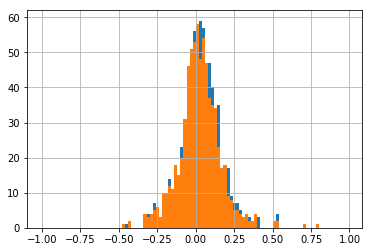

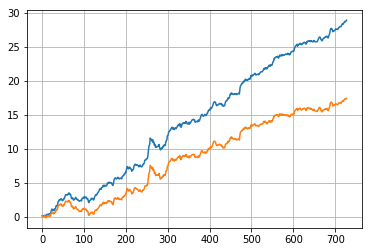

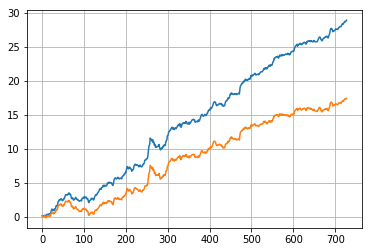

In [7]:
import matplotlib.pyplot as plt

plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

plt.figure(2)
#print(pos_under_thr['ROI'])
print(positions[pos_under_2p]['GROI'].shape)
cumG = plt.plot(positions['GROI'].cumsum())#, bins=bins
cumR = plt.plot(positions['ROI'].cumsum())
plt.grid()

Asset
AUDCAD    0.258453
AUDJPY    2.561115
CADJPY    0.115273
CHFJPY    0.083253
EURAUD    0.158090
EURCAD    1.241721
EURCHF   -0.073826
EURGBP    1.211509
EURJPY    2.397916
EURNZD    0.702530
EURUSD    1.688039
GBPAUD    1.507690
GBPCAD    1.516838
GBPCHF    0.165534
GBPJPY    0.272567
GBPUSD    1.458380
GOLD      0.552830
NZDUSD    0.979884
USDCAD    0.844591
USDCHF   -0.267375
USDJPY    0.044785
Name: ROI, dtype: float64
Di
10    0.144522
11    0.110953
12    2.161010
13   -0.039431
14    0.879686
15    0.051816
16   -0.652849
17   -0.067202
18    0.176842
19   -0.119154
20   -0.317240
21    1.165438
22    2.495202
23    1.459122
24    2.835595
25    3.475579
26    1.168712
27    1.010950
28    0.509897
31    0.220126
32    1.348528
33    0.036238
34   -0.013157
35    2.175946
36    0.991580
37    1.141514
38    1.322031
39    0.439963
40    1.563934
41    0.048359
42    0.543656
43    1.076231
44    0.581999
45    0.952553
Name: GROI, dtype: float64
Di
10    0.082639
11    0.031

(array([1., 7., 6., 4., 5., 4., 1., 1., 1., 2., 1., 0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 12 Patch objects>)

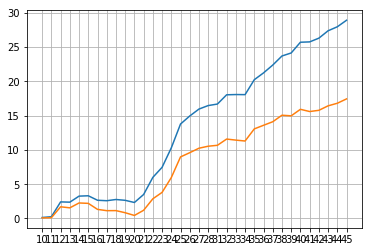

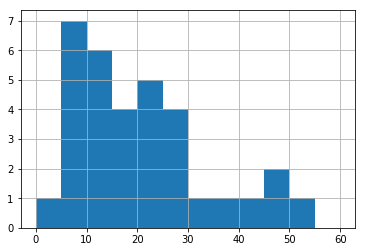

In [8]:
#positions
#grouped = pos_format.groupby(['asset'])
weekly_group = pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['ROI']
weekly_group_G = pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['GROI']
asset_group = pos_under_thr.groupby(['Asset'])
weekly_sum = weekly_group.sum()
weekly_sum_G = weekly_group_G.sum()
weekly_count = weekly_group.count()
#weekly_sum.cumsum()
#print(asset_group['GROI'].sum())
print(asset_group['ROI'].sum())
plt.figure(0)
plt.plot(weekly_sum_G.cumsum())
plt.plot(range(weekly_sum.shape[0]), weekly_sum.cumsum())
plt.grid()
print(weekly_sum_G)
print(weekly_sum)#.cumsum()
print(weekly_count)
print(weekly_sum.cumsum())
print(weekly_count.shape)
#print(pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['GROI'].sum())
#print(weekly_count)
plt.figure(1)
plt.grid()
plt.hist(weekly_count, bins=range(0,max(weekly_count),5))

#for name, group in asset_group:
#    print(name)
#    print(group.to_string())
#pd.to_datetime(positions['Di']).dt.strftime('%W')
#pd.to_datetime(positions['Di'])#.groupby('Name').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

In [9]:
# edit config without saving for test purposes
from kaissandra.testRNN import test_RNN
from kaissandra.config import *
config=retrieve_config('C0318INVO')
config['IDresults']='100318SR20'
config['save_journal'] = True
config['startFrom'] = 21
config['endAt']= 21
config['feats_from_bids'] = 'SHORT'
resolution = 20
config['resolution'] = resolution
config['thresholds_mc'] = [.5+i/resolution for i in range(int(resolution/2))]
config['thresholds_md'] = [.5+i/resolution for i in range(int(resolution/2))]

config['cost_name'] = '000318TI02'

test_RNN(config)

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Config file ../../config/C0318INVO.config loaded from disk
IDresults: 100318SR20
INFO:tensorflow:Restoring parameters from ../../RNN/weights/000318INVO/000021/000021
Parameters loaded. Epoch 21
Epoch 21 of 21. Getting output...


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [06:40<00:00,  4.67s/it]


Getting results
Epoch 21, J_train = 1.6114154795145255, J_test = 6.1934182371412
feats_from_bids is SHORT


0it [00:00, ?it/s]
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 6.1934182371412, J_train = 1.6114154795145255, Accuracy=0.5609714765265643
RD = 731305 NZ = 1405322 NZA = 2648862 pNZ = 40.640% pNZA = 76.601% AD = 52.04% ADA = 27.61% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.55
RD = 124855 NZ = 221231 NZA = 395670 pNZ = 6.398% pNZA = 11.442% AD = 56.44% ADA = 31.56% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 34793/34793 [00:10<00:00, 3344.36it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.6
RD = 24380 NZ = 36372 NZA = 64289 pNZ = 1.052% pNZA = 1.859% AD = 67.03% ADA = 37.92% NO = 6128 GSP = 62.37% NSP = 34.42%
SI2 = -353.56 SI = -1077.56 eGROI = 70.77% eROI = -142.10% eROI2 = -51.79% eROI3 = -113.07% mSpread = 0.0347%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 13793/13793 [00:04<00:00, 3191.64it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.65
RD = 10522 NZ = 13596 NZA = 24221 pNZ = 0.393% pNZA = 0.700% AD = 77.39% ADA = 43.44% NO = 2684 GSP = 67.62% NSP = 30.59%
SI2 = -48.68 SI = -574.68 eGROI = 51.22% eROI = -66.50% eROI2 = -2.46% eROI3 = -29.30% mSpread = 0.0439%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3301/3301 [00:01<00:00, 2669.14it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.7
RD = 4601 NZ = 5473 NZA = 9333 pNZ = 0.158% pNZA = 0.270% AD = 84.07% ADA = 49.30% NO = 1005 GSP = 73.33% NSP = 28.06%
SI2 = 6.40 SI = -240.60 eGROI = 23.54% eROI = -27.31% eROI2 = 3.44% eROI3 = -6.61% mSpread = 0.0506%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 1575.58it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.75
RD = 1859 NZ = 2068 NZA = 3434 pNZ = 0.060% pNZA = 0.099% AD = 89.89% ADA = 54.14% NO = 50 GSP = 74.00% NSP = 36.00%
SI2 = 2.00 SI = -8.00 eGROI = 1.94% eROI = -0.66% eROI2 = 0.94% eROI3 = 0.44% mSpread = 0.0520%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.8
RD = 670 NZ = 727 NZA = 1159 pNZ = 0.021% pNZA = 0.034% AD = 92.16% ADA = 57.81% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.85
RD = 35 NZ = 36 NZA = 59 pNZ = 0.001% pNZA = 0.002% AD = 97.22% ADA = 59.32% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.5. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.5
RD = 495036 NZ = 945306 NZA = 1652142 pNZ = 27.337% pNZA = 47.777% AD = 52.37% ADA = 29.96% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 110679/110679 [00:34<00:00, 3196.10it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.55
RD = 97602 NZ = 171842 NZA = 288255 pNZ = 4.969% pNZA = 8.336% AD = 56.80% ADA = 33.86% NO = 22125 GSP = 57.73% NSP = 38.26%
SI2 = -2279.00 SI = -3039.00 eGROI = 114.91% eROI = -422.30% eROI2 = -327.59% eROI3 = -548.84% mSpread = 0.0243%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 30166/30166 [00:19<00:00, 1531.43it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.6
RD = 20918 NZ = 31430 NZA = 52728 pNZ = 0.909% pNZA = 1.525% AD = 66.55% ADA = 39.67% NO = 5611 GSP = 62.64% NSP = 35.34%
SI2 = -280.72 SI = -934.72 eGROI = 67.59% eROI = -126.62% eROI2 = -44.63% eROI3 = -100.74% mSpread = 0.0346%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 12484/12484 [00:05<00:00, 2112.58it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.65
RD = 9099 NZ = 11838 NZA = 20237 pNZ = 0.342% pNZA = 0.585% AD = 76.86% ADA = 44.96% NO = 2494 GSP = 68.12% NSP = 31.92%
SI2 = -13.88 SI = -500.88 eGROI = 49.37% eROI = -59.86% eROI2 = -0.51% eROI3 = -25.45% mSpread = 0.0438%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3167/3167 [00:01<00:00, 2306.00it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.7
RD = 3945 NZ = 4698 NZA = 7690 pNZ = 0.136% pNZA = 0.222% AD = 83.97% ADA = 51.30% NO = 966 GSP = 72.98% NSP = 28.26%
SI2 = 9.68 SI = -229.32 eGROI = 22.47% eROI = -26.08% eROI2 = 3.15% eROI3 = -6.51% mSpread = 0.0503%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 1181.83it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.75
RD = 1539 NZ = 1696 NZA = 2662 pNZ = 0.049% pNZA = 0.077% AD = 90.74% ADA = 57.81% NO = 50 GSP = 74.00% NSP = 36.00%
SI2 = 2.00 SI = -8.00 eGROI = 1.94% eROI = -0.66% eROI2 = 0.94% eROI3 = 0.44% mSpread = 0.0520%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.8
RD = 583 NZ = 628 NZA = 940 pNZ = 0.018% pNZA = 0.027% AD = 92.83% ADA = 62.02% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.85
RD = 34 NZ = 34 NZA = 52 pNZ = 0.001% pNZA = 0.002% AD = 100.00% ADA = 65.38% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.55. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.5
RD = 219658 NZ = 411164 NZA = 656103 pNZ = 11.890% pNZA = 18.974% AD = 53.42% ADA = 33.48% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 76243/76243 [00:38<00:00, 1972.36it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.55
RD = 62134 NZ = 107594 NZA = 168040 pNZ = 3.111% pNZA = 4.859% AD = 57.75% ADA = 36.98% NO = 15370 GSP = 58.25% NSP = 39.83%
SI2 = -1346.40 SI = -1870.40 eGROI = 89.54% eROI = -285.63% eROI2 = -217.86% eROI3 = -371.56% mSpread = 0.0244%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 22585/22585 [00:11<00:00, 1940.59it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.6
RD = 16272 NZ = 24580 NZA = 38788 pNZ = 0.711% pNZA = 1.122% AD = 66.20% ADA = 41.95% NO = 4734 GSP = 62.38% NSP = 36.92%
SI2 = -204.68 SI = -713.68 eGROI = 55.58% eROI = -104.59% eROI2 = -39.10% eROI3 = -86.44% mSpread = 0.0338%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 9557/9557 [00:04<00:00, 1956.36it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.65
RD = 7090 NZ = 9351 NZA = 15129 pNZ = 0.270% pNZA = 0.438% AD = 75.82% ADA = 46.86% NO = 2116 GSP = 66.59% NSP = 33.93%
SI2 = -3.32 SI = -382.32 eGROI = 40.98% eROI = -49.16% eROI2 = -1.34% eROI3 = -22.50% mSpread = 0.0426%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2607/2607 [00:01<00:00, 1575.59it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.7
RD = 3108 NZ = 3732 NZA = 5841 pNZ = 0.108% pNZA = 0.169% AD = 83.28% ADA = 53.21% NO = 839 GSP = 71.75% NSP = 29.56%
SI2 = 4.72 SI = -188.28 eGROI = 19.36% eROI = -22.56% eROI2 = 2.58% eROI3 = -5.81% mSpread = 0.0500%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 1238.53it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.75
RD = 1209 NZ = 1331 NZA = 1986 pNZ = 0.038% pNZA = 0.057% AD = 90.83% ADA = 60.88% NO = 47 GSP = 74.47% NSP = 36.17%
SI2 = 1.56 SI = -7.44 eGROI = 1.84% eROI = -0.62% eROI2 = 0.90% eROI3 = 0.43% mSpread = 0.0523%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.8
RD = 476 NZ = 512 NZA = 730 pNZ = 0.015% pNZA = 0.021% AD = 92.97% ADA = 65.21% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.85
RD = 29 NZ = 29 NZA = 44 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 65.91% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.6. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 107591/107591 [00:51<00:00, 2103.76it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.5
RD = 74153 NZ = 135317 NZA = 198592 pNZ = 3.913% pNZA = 5.743% AD = 54.80% ADA = 37.34% NO = 12719 GSP = 57.26% NSP = 41.55%
SI2 = -1010.88 SI = -1328.88 eGROI = 54.10% eROI = -241.16% eROI2 = -200.28% eROI3 = -327.47% mSpread = 0.0232%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 42083/42083 [00:20<00:00, 2083.88it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.55
RD = 31787 NZ = 54278 NZA = 78983 pNZ = 1.570% pNZA = 2.284% AD = 58.56% ADA = 40.25% NO = 8767 GSP = 58.05% NSP = 41.11%
SI2 = -604.84 SI = -954.84 eGROI = 50.12% eROI = -166.53% eROI2 = -125.22% eROI3 = -212.89% mSpread = 0.0247%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 13969/13969 [00:06<00:00, 2052.76it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.6
RD = 10858 NZ = 16561 NZA = 24293 pNZ = 0.479% pNZA = 0.703% AD = 65.56% ADA = 44.70% NO = 3503 GSP = 62.43% NSP = 38.28%
SI2 = -138.56 SI = -480.56 eGROI = 36.17% eROI = -76.15% eROI2 = -33.89% eROI3 = -68.92% mSpread = 0.0321%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 5532/5532 [00:02<00:00, 2037.71it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.65
RD = 4687 NZ = 6271 NZA = 9305 pNZ = 0.181% pNZA = 0.269% AD = 74.74% ADA = 50.37% NO = 1532 GSP = 66.64% NSP = 36.88%
SI2 = 17.36 SI = -231.64 eGROI = 29.28% eROI = -32.55% eROI2 = -1.36% eROI3 = -16.68% mSpread = 0.0404%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1552/1552 [00:00<00:00, 3143.65it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.7
RD = 2083 NZ = 2524 NZA = 3684 pNZ = 0.073% pNZA = 0.107% AD = 82.53% ADA = 56.54% NO = 578 GSP = 71.80% NSP = 32.70%
SI2 = 15.44 SI = -111.56 eGROI = 13.62% eROI = -14.52% eROI2 = 2.06% eROI3 = -3.72% mSpread = 0.0487%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 848.39it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.75
RD = 874 NZ = 959 NZA = 1327 pNZ = 0.028% pNZA = 0.038% AD = 91.14% ADA = 65.86% NO = 37 GSP = 72.97% NSP = 37.84%
SI2 = 1.76 SI = -5.24 eGROI = 1.56% eROI = -0.33% eROI2 = 0.82% eROI3 = 0.45% mSpread = 0.0511%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.8
RD = 343 NZ = 367 NZA = 500 pNZ = 0.011% pNZA = 0.014% AD = 93.46% ADA = 68.60% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.85
RD = 20 NZ = 20 NZA = 28 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 71.43% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.65. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 35282/35282 [00:17<00:00, 1977.71it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.5
RD = 25248 NZ = 45191 NZA = 62022 pNZ = 1.307% pNZA = 1.794% AD = 55.87% ADA = 40.71% NO = 5442 GSP = 56.30% NSP = 42.02%
SI2 = -386.84 SI = -542.84 eGROI = 17.77% eROI = -111.94% eROI2 = -91.07% eROI3 = -145.49% mSpread = 0.0238%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 19911/19911 [00:11<00:00, 1733.11it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.55
RD = 14605 NZ = 24707 NZA = 33803 pNZ = 0.714% pNZA = 0.978% AD = 59.11% ADA = 43.21% NO = 4307 GSP = 58.67% NSP = 42.63%
SI2 = -241.64 SI = -403.64 eGROI = 24.01% eROI = -81.95% eROI2 = -62.13% eROI3 = -105.20% mSpread = 0.0246%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7683/7683 [00:04<00:00, 1821.55it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.6
RD = 6329 NZ = 9868 NZA = 13431 pNZ = 0.285% pNZA = 0.388% AD = 64.14% ADA = 47.12% NO = 2185 GSP = 60.46% NSP = 40.73%
SI2 = -96.20 SI = -246.20 eGROI = 16.13% eROI = -47.65% eROI2 = -27.57% eROI3 = -49.42% mSpread = 0.0292%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2498/2498 [00:01<00:00, 1584.19it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.65
RD = 2620 NZ = 3557 NZA = 4881 pNZ = 0.103% pNZA = 0.141% AD = 73.66% ADA = 53.68% NO = 868 GSP = 64.98% NSP = 39.17%
SI2 = 1.64 SI = -111.36 eGROI = 14.55% eROI = -17.39% eROI2 = -2.81% eROI3 = -11.49% mSpread = 0.0368%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████| 515/515 [00:00<00:00, 828.83it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.7
RD = 1111 NZ = 1339 NZA = 1845 pNZ = 0.039% pNZA = 0.053% AD = 82.97% ADA = 60.22% NO = 249 GSP = 71.49% NSP = 31.73%
SI2 = 7.52 SI = -50.48 eGROI = 5.69% eROI = -6.49% eROI2 = 0.71% eROI3 = -1.78% mSpread = 0.0489%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1086.20it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.75
RD = 547 NZ = 603 NZA = 801 pNZ = 0.017% pNZA = 0.023% AD = 90.71% ADA = 68.29% NO = 13 GSP = 92.31% NSP = 69.23%
SI2 = 3.24 SI = 2.24 eGROI = 0.73% eROI = 0.02% eROI2 = 0.47% eROI3 = 0.34% mSpread = 0.0549%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.8
RD = 221 NZ = 237 NZA = 316 pNZ = 0.007% pNZA = 0.009% AD = 93.25% ADA = 69.94% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.85
RD = 10 NZ = 10 NZA = 15 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 66.67% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.7. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 12718/12718 [00:08<00:00, 1581.70it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.5
RD = 9322 NZ = 16532 NZA = 21563 pNZ = 0.478% pNZA = 0.624% AD = 56.39% ADA = 43.23% NO = 2557 GSP = 54.44% NSP = 41.77%
SI2 = -182.64 SI = -261.64 eGROI = 7.06% eROI = -52.89% eROI2 = -44.08% eROI3 = -69.65% mSpread = 0.0234%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8965/8965 [00:03<00:00, 2694.46it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.55
RD = 6347 NZ = 10877 NZA = 14161 pNZ = 0.315% pNZA = 0.410% AD = 58.35% ADA = 44.82% NO = 2079 GSP = 55.94% NSP = 43.00%
SI2 = -123.08 SI = -187.08 eGROI = 7.12% eROI = -42.66% eROI2 = -34.46% eROI3 = -55.25% mSpread = 0.0239%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 4302/4302 [00:01<00:00, 2714.53it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.6
RD = 3320 NZ = 5369 NZA = 6984 pNZ = 0.155% pNZA = 0.202% AD = 61.84% ADA = 47.54% NO = 1244 GSP = 59.00% NSP = 43.81%
SI2 = -53.88 SI = -101.88 eGROI = 6.65% eROI = -25.22% eROI2 = -18.23% eROI3 = -30.67% mSpread = 0.0256%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1202/1202 [00:00<00:00, 3338.46it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.65
RD = 1353 NZ = 1908 NZA = 2461 pNZ = 0.055% pNZA = 0.071% AD = 70.91% ADA = 54.98% NO = 449 GSP = 61.02% NSP = 46.55%
SI2 = -5.48 SI = -24.48 eGROI = 7.54% eROI = -5.28% eROI2 = -1.44% eROI3 = -5.93% mSpread = 0.0285%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.54it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.7
RD = 515 NZ = 626 NZA = 823 pNZ = 0.018% pNZA = 0.024% AD = 82.27% ADA = 62.58% NO = 60 GSP = 60.00% NSP = 40.00%
SI2 = -4.20 SI = -7.20 eGROI = 1.54% eROI = -0.81% eROI2 = 0.34% eROI3 = -0.26% mSpread = 0.0392%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1000.31it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.75
RD = 291 NZ = 325 NZA = 426 pNZ = 0.009% pNZA = 0.012% AD = 89.54% ADA = 68.31% NO = 2 GSP = 100.00% NSP = 100.00%
SI2 = -0.04 SI = 0.96 eGROI = 0.14% eROI = 0.07% eROI2 = 0.10% eROI3 = 0.08% mSpread = 0.0395%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.8
RD = 122 NZ = 136 NZA = 173 pNZ = 0.004% pNZA = 0.005% AD = 89.71% ADA = 70.52% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.85
RD = 3 NZ = 3 NZA = 5 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 60.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.75. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 4238/4238 [00:01<00:00, 3194.90it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.5
RD = 3273 NZ = 5810 NZA = 7207 pNZ = 0.168% pNZA = 0.208% AD = 56.33% ADA = 45.41% NO = 1129 GSP = 53.32% NSP = 44.02%
SI2 = -72.08 SI = -90.08 eGROI = 4.23% eROI = -20.72% eROI2 = -18.35% eROI3 = -29.64% mSpread = 0.0221%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3352/3352 [00:01<00:00, 3030.57it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.55
RD = 2381 NZ = 4164 NZA = 5174 pNZ = 0.120% pNZA = 0.150% AD = 57.18% ADA = 46.02% NO = 908 GSP = 54.63% NSP = 44.05%
SI2 = -58.16 SI = -72.16 eGROI = 2.55% eROI = -17.49% eROI2 = -15.61% eROI3 = -24.69% mSpread = 0.0221%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2033/2033 [00:00<00:00, 2875.00it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.6
RD = 1466 NZ = 2445 NZA = 3035 pNZ = 0.071% pNZA = 0.088% AD = 59.96% ADA = 48.30% NO = 597 GSP = 53.10% NSP = 43.22%
SI2 = -41.44 SI = -52.44 eGROI = -2.02% eROI = -15.24% eROI2 = -13.96% eROI3 = -19.93% mSpread = 0.0221%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 725/725 [00:00<00:00, 2360.13it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.65
RD = 671 NZ = 999 NZA = 1225 pNZ = 0.029% pNZA = 0.035% AD = 67.17% ADA = 54.78% NO = 253 GSP = 56.13% NSP = 45.45%
SI2 = -19.56 SI = -16.56 eGROI = 1.95% eROI = -3.54% eROI2 = -3.11% eROI3 = -5.64% mSpread = 0.0217%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 1336.90it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.7
RD = 222 NZ = 269 NZA = 328 pNZ = 0.008% pNZA = 0.009% AD = 82.53% ADA = 67.68% NO = 27 GSP = 70.37% NSP = 51.85%
SI2 = 0.96 SI = -0.04 eGROI = 1.01% eROI = 0.46% eROI2 = 0.47% eROI3 = 0.20% mSpread = 0.0201%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.75
RD = 114 NZ = 126 NZA = 156 pNZ = 0.004% pNZA = 0.005% AD = 90.48% ADA = 73.08% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.8
RD = 51 NZ = 57 NZA = 70 pNZ = 0.002% pNZA = 0.002% AD = 89.47% ADA = 72.86% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.85
RD = 1 NZ = 1 NZA = 2 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 50.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.8. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 670/670 [00:00<00:00, 2399.21it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.5
RD = 648 NZ = 1118 NZA = 1356 pNZ = 0.032% pNZA = 0.039% AD = 57.96% ADA = 47.79% NO = 354 GSP = 52.26% NSP = 47.46%
SI2 = -20.08 SI = -16.08 eGROI = 0.52% eROI = -6.90% eROI2 = -6.56% eROI3 = -10.10% mSpread = 0.0210%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 516/516 [00:00<00:00, 2289.22it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.55
RD = 447 NZ = 764 NZA = 928 pNZ = 0.022% pNZA = 0.027% AD = 58.51% ADA = 48.17% NO = 261 GSP = 53.26% NSP = 47.13%
SI2 = -15.72 SI = -12.72 eGROI = 0.27% eROI = -5.09% eROI2 = -4.95% eROI3 = -7.56% mSpread = 0.0205%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 2361.92it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.6
RD = 280 NZ = 476 NZA = 583 pNZ = 0.014% pNZA = 0.017% AD = 58.82% ADA = 48.03% NO = 171 GSP = 52.05% NSP = 46.20%
SI2 = -12.92 SI = -9.92 eGROI = 0.25% eROI = -3.04% eROI2 = -3.17% eROI3 = -4.88% mSpread = 0.0193%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 2690.48it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.65
RD = 151 NZ = 242 NZA = 292 pNZ = 0.007% pNZA = 0.008% AD = 62.40% ADA = 51.71% NO = 93 GSP = 54.84% NSP = 50.54%
SI2 = -4.36 SI = -1.36 eGROI = 0.30% eROI = -1.54% eROI2 = -1.56% eROI3 = -2.49% mSpread = 0.0198%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1671.13it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.7
RD = 57 NZ = 72 NZA = 87 pNZ = 0.002% pNZA = 0.003% AD = 79.17% ADA = 65.52% NO = 11 GSP = 81.82% NSP = 63.64%
SI2 = 1.28 SI = 1.28 eGROI = 0.76% eROI = 0.58% eROI2 = 0.54% eROI3 = 0.43% mSpread = 0.0168%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.75
RD = 23 NZ = 26 NZA = 32 pNZ = 0.001% pNZA = 0.001% AD = 88.46% ADA = 71.88% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.8
RD = 9 NZ = 11 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 81.82% ADA = 75.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.85
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.85. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.5
RD = 2 NZ = 2 NZA = 3 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 66.67% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.55
RD = 2 NZ = 2 NZA = 2 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.6
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.65
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.7
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.75
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.8
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.85
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.9. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.5
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.55
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.6
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.65
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.7
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.75
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.8
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.85
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 0. Threshold MC = 0.95. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 6.1934182371412, J_train = 1.6114154795145255, Accuracy=0.5588925255509408
RD = 740503 NZ = 1422568 NZA = 2690543 pNZ = 41.139% pNZA = 77.806% AD = 52.05% ADA = 27.52% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.55
RD = 128413 NZ = 226041 NZA = 408596 pNZ = 6.537% pNZA = 11.816% AD = 56.81% ADA = 31.43% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 35817/35817 [00:10<00:00, 3372.32it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.6
RD = 30167 NZ = 45715 NZA = 81344 pNZ = 1.322% pNZA = 2.352% AD = 65.99% ADA = 37.09% NO = 6084 GSP = 61.87% NSP = 34.62%
SI2 = -372.68 SI = -1057.68 eGROI = 66.02% eROI = -140.78% eROI2 = -55.66% eROI3 = -116.50% mSpread = 0.0340%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 17735/17735 [00:05<00:00, 3353.19it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.65
RD = 13428 NZ = 17840 NZA = 32106 pNZ = 0.516% pNZA = 0.928% AD = 75.27% ADA = 41.82% NO = 2954 GSP = 66.55% NSP = 31.42%
SI2 = -71.08 SI = -608.08 eGROI = 53.87% eROI = -72.95% eROI2 = -5.21% eROI3 = -34.75% mSpread = 0.0429%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7830/7830 [00:02<00:00, 3233.42it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.7
RD = 6830 NZ = 8384 NZA = 14561 pNZ = 0.242% pNZA = 0.421% AD = 81.46% ADA = 46.91% NO = 1655 GSP = 70.82% NSP = 29.91%
SI2 = 18.40 SI = -365.60 eGROI = 40.29% eROI = -38.43% eROI2 = 7.19% eROI3 = -9.36% mSpread = 0.0476%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1998/1998 [00:00<00:00, 2797.89it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.75
RD = 2847 NZ = 3286 NZA = 5358 pNZ = 0.095% pNZA = 0.155% AD = 86.64% ADA = 53.14% NO = 642 GSP = 75.39% NSP = 30.06%
SI2 = 37.16 SI = -140.84 eGROI = 18.19% eROI = -14.42% eROI2 = 5.35% eROI3 = -1.07% mSpread = 0.0508%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 2274.26it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.8
RD = 806 NZ = 874 NZA = 1412 pNZ = 0.025% pNZA = 0.041% AD = 92.22% ADA = 57.08% NO = 47 GSP = 80.85% NSP = 36.17%
SI2 = 3.56 SI = -7.44 eGROI = 2.78% eROI = 0.23% eROI2 = 1.84% eROI3 = 1.37% mSpread = 0.0542%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.85
RD = 195 NZ = 212 NZA = 326 pNZ = 0.006% pNZA = 0.009% AD = 91.98% ADA = 59.82% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.9
RD = 6 NZ = 6 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 50.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.5. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.5
RD = 493190 NZ = 939968 NZA = 1638047 pNZ = 27.182% pNZA = 47.370% AD = 52.47% ADA = 30.11% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 119489/119489 [00:41<00:00, 2863.42it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.55
RD = 99487 NZ = 173872 NZA = 291085 pNZ = 5.028% pNZA = 8.418% AD = 57.22% ADA = 34.18% NO = 21155 GSP = 58.30% NSP = 39.73%
SI2 = -1974.60 SI = -2595.60 eGROI = 124.91% eROI = -380.70% eROI2 = -298.19% eROI3 = -509.74% mSpread = 0.0239%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 30405/30405 [00:08<00:00, 3680.49it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.6
RD = 24817 NZ = 37881 NZA = 63127 pNZ = 1.095% pNZA = 1.826% AD = 65.51% ADA = 39.31% NO = 5608 GSP = 61.79% NSP = 36.31%
SI2 = -298.16 SI = -880.16 eGROI = 61.89% eROI = -126.08% eROI2 = -50.27% eROI3 = -106.35% mSpread = 0.0335%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 15355/15355 [00:04<00:00, 3578.72it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.65
RD = 11286 NZ = 15148 NZA = 25789 pNZ = 0.438% pNZA = 0.746% AD = 74.50% ADA = 43.76% NO = 2721 GSP = 66.30% NSP = 33.15%
SI2 = -31.92 SI = -512.92 eGROI = 50.84% eROI = -64.49% eROI2 = -3.58% eROI3 = -30.79% mSpread = 0.0424%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7153/7153 [00:02<00:00, 3458.03it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.7
RD = 5852 NZ = 7230 NZA = 12085 pNZ = 0.209% pNZA = 0.349% AD = 80.94% ADA = 48.42% NO = 1544 GSP = 70.60% NSP = 30.63%
SI2 = 31.12 SI = -329.88 eGROI = 37.98% eROI = -35.60% eROI2 = 7.10% eROI3 = -8.34% mSpread = 0.0477%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1933/1933 [00:00<00:00, 3241.00it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.75
RD = 2500 NZ = 2885 NZA = 4538 pNZ = 0.083% pNZA = 0.131% AD = 86.66% ADA = 55.09% NO = 617 GSP = 74.55% NSP = 30.47%
SI2 = 36.16 SI = -132.84 eGROI = 17.24% eROI = -13.86% eROI2 = 4.90% eROI3 = -1.27% mSpread = 0.0504%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 1828.41it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.8
RD = 698 NZ = 754 NZA = 1159 pNZ = 0.022% pNZA = 0.034% AD = 92.57% ADA = 60.22% NO = 47 GSP = 80.85% NSP = 36.17%
SI2 = 3.56 SI = -7.44 eGROI = 2.78% eROI = 0.23% eROI2 = 1.84% eROI3 = 1.37% mSpread = 0.0542%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.85
RD = 181 NZ = 193 NZA = 278 pNZ = 0.006% pNZA = 0.008% AD = 93.78% ADA = 65.11% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.9
RD = 6 NZ = 6 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 50.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.55. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.5
RD = 207173 NZ = 386487 NZA = 611728 pNZ = 11.177% pNZA = 17.690% AD = 53.60% ADA = 33.87% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 87383/87383 [00:27<00:00, 3205.33it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.55
RD = 63921 NZ = 110303 NZA = 171452 pNZ = 3.190% pNZA = 4.958% AD = 57.95% ADA = 37.28% NO = 15833 GSP = 58.52% NSP = 41.16%
SI2 = -1305.16 SI = -1716.16 eGROI = 103.06% eROI = -269.44% eROI2 = -213.60% eROI3 = -371.93% mSpread = 0.0235%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 22218/22218 [00:07<00:00, 2820.92it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.6
RD = 18193 NZ = 28024 NZA = 43436 pNZ = 0.810% pNZA = 1.256% AD = 64.92% ADA = 41.88% NO = 4748 GSP = 60.95% NSP = 37.59%
SI2 = -254.96 SI = -683.96 eGROI = 47.49% eROI = -104.09% eROI2 = -47.47% eROI3 = -94.95% mSpread = 0.0319%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 11043/11043 [00:03<00:00, 2954.74it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.65
RD = 8427 NZ = 11462 NZA = 18315 pNZ = 0.331% pNZA = 0.530% AD = 73.52% ADA = 46.01% NO = 2237 GSP = 65.58% NSP = 34.69%
SI2 = -30.24 SI = -387.24 eGROI = 40.47% eROI = -50.01% eROI2 = -4.27% eROI3 = -26.64% mSpread = 0.0404%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 5410/5410 [00:01<00:00, 2998.52it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.7
RD = 4488 NZ = 5602 NZA = 8928 pNZ = 0.162% pNZA = 0.258% AD = 80.11% ADA = 50.27% NO = 1266 GSP = 69.19% NSP = 31.83%
SI2 = 17.68 SI = -255.32 eGROI = 29.72% eROI = -29.06% eROI2 = 4.40% eROI3 = -8.26% mSpread = 0.0464%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1588/1588 [00:00<00:00, 1995.25it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.75
RD = 2008 NZ = 2337 NZA = 3529 pNZ = 0.068% pNZA = 0.102% AD = 85.92% ADA = 56.90% NO = 528 GSP = 74.05% NSP = 31.63%
SI2 = 26.44 SI = -107.56 eGROI = 15.03% eROI = -11.31% eROI2 = 4.47% eROI3 = -0.81% mSpread = 0.0499%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 1512.64it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.8
RD = 582 NZ = 625 NZA = 901 pNZ = 0.018% pNZA = 0.026% AD = 93.12% ADA = 64.59% NO = 44 GSP = 86.36% NSP = 34.09%
SI2 = 3.12 SI = -7.88 eGROI = 2.68% eROI = 0.31% eROI2 = 1.80% eROI3 = 1.36% mSpread = 0.0538%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.85
RD = 156 NZ = 165 NZA = 223 pNZ = 0.005% pNZA = 0.006% AD = 94.55% ADA = 69.96% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.9
RD = 6 NZ = 6 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 50.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.6. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 103307/103307 [00:43<00:00, 2362.16it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.5
RD = 67731 NZ = 123189 NZA = 179157 pNZ = 3.562% pNZA = 5.181% AD = 54.98% ADA = 37.81% NO = 12104 GSP = 57.56% NSP = 42.49%
SI2 = -866.08 SI = -1151.08 eGROI = 60.53% eROI = -215.81% eROI2 = -181.55% eROI3 = -302.59% mSpread = 0.0228%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 46720/46720 [00:26<00:00, 1739.08it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.55
RD = 31685 NZ = 54035 NZA = 78074 pNZ = 1.563% pNZA = 2.258% AD = 58.64% ADA = 40.58% NO = 9023 GSP = 58.26% NSP = 42.26%
SI2 = -651.96 SI = -878.96 eGROI = 60.02% eROI = -153.62% eROI2 = -120.44% eROI3 = -210.67% mSpread = 0.0237%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 14207/14207 [00:10<00:00, 1399.28it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.6
RD = 11638 NZ = 17975 NZA = 25879 pNZ = 0.520% pNZA = 0.748% AD = 64.75% ADA = 44.97% NO = 3635 GSP = 60.77% NSP = 39.89%
SI2 = -161.20 SI = -440.20 eGROI = 33.17% eROI = -76.08% eROI2 = -39.53% eROI3 = -75.88% mSpread = 0.0301%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 6306/6306 [00:03<00:00, 1694.19it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.65
RD = 5450 NZ = 7529 NZA = 11058 pNZ = 0.218% pNZA = 0.320% AD = 72.39% ADA = 49.29% NO = 1658 GSP = 65.80% NSP = 38.00%
SI2 = -5.16 SI = -232.16 eGROI = 29.52% eROI = -33.76% eROI2 = -3.64% eROI3 = -20.22% mSpread = 0.0382%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3033/3033 [00:01<00:00, 1919.85it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.7
RD = 2896 NZ = 3629 NZA = 5409 pNZ = 0.105% pNZA = 0.156% AD = 79.80% ADA = 53.54% NO = 874 GSP = 69.45% NSP = 33.98%
SI2 = 16.52 SI = -157.48 eGROI = 21.51% eROI = -18.07% eROI2 = 4.03% eROI3 = -4.71% mSpread = 0.0453%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 919/919 [00:00<00:00, 1349.10it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.75
RD = 1382 NZ = 1607 NZA = 2320 pNZ = 0.046% pNZA = 0.067% AD = 86.00% ADA = 59.57% NO = 363 GSP = 73.55% NSP = 35.26%
SI2 = 21.24 SI = -60.76 eGROI = 11.29% eROI = -6.53% eROI2 = 4.03% eROI3 = 0.40% mSpread = 0.0491%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 1237.31it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.8
RD = 450 NZ = 481 NZA = 676 pNZ = 0.014% pNZA = 0.020% AD = 93.56% ADA = 66.57% NO = 34 GSP = 85.29% NSP = 41.18%
SI2 = 3.32 SI = -3.68 eGROI = 2.43% eROI = 0.58% eROI2 = 1.75% eROI3 = 1.41% mSpread = 0.0544%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.85
RD = 134 NZ = 140 NZA = 179 pNZ = 0.004% pNZA = 0.005% AD = 95.71% ADA = 74.86% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.9
RD = 5 NZ = 5 NZA = 10 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 50.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.65. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 31854/31854 [00:15<00:00, 2118.21it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.5
RD = 21680 NZ = 38650 NZA = 52435 pNZ = 1.118% pNZA = 1.516% AD = 56.09% ADA = 41.35% NO = 4967 GSP = 55.89% NSP = 42.34%
SI2 = -366.84 SI = -479.84 eGROI = 15.72% eROI = -100.16% eROI2 = -83.62% eROI3 = -133.29% mSpread = 0.0233%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 20025/20025 [00:12<00:00, 1576.11it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.55
RD = 13419 NZ = 22799 NZA = 30842 pNZ = 0.659% pNZA = 0.892% AD = 58.86% ADA = 43.51% NO = 4129 GSP = 57.21% NSP = 42.67%
SI2 = -249.08 SI = -385.08 eGROI = 23.57% eROI = -75.17% eROI2 = -59.01% eROI3 = -100.30% mSpread = 0.0239%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8357/8357 [00:06<00:00, 1362.46it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.6
RD = 6609 NZ = 10369 NZA = 13884 pNZ = 0.300% pNZA = 0.402% AD = 63.74% ADA = 47.60% NO = 2312 GSP = 58.91% NSP = 41.78%
SI2 = -108.24 SI = -236.24 eGROI = 13.10% eROI = -50.53% eROI2 = -33.14% eROI3 = -56.26% mSpread = 0.0275%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3155/3155 [00:01<00:00, 1690.73it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.65
RD = 3133 NZ = 4452 NZA = 5997 pNZ = 0.129% pNZA = 0.173% AD = 70.37% ADA = 52.24% NO = 1021 GSP = 63.66% NSP = 41.72%
SI2 = -0.92 SI = -104.92 eGROI = 15.19% eROI = -19.22% eROI2 = -5.23% eROI3 = -15.44% mSpread = 0.0337%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1152/1152 [00:01<00:00, 1120.32it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.7
RD = 1534 NZ = 1932 NZA = 2642 pNZ = 0.056% pNZA = 0.076% AD = 79.40% ADA = 58.06% NO = 440 GSP = 69.77% NSP = 39.32%
SI2 = 13.20 SI = -55.80 eGROI = 11.05% eROI = -7.20% eROI2 = 2.25% eROI3 = -2.15% mSpread = 0.0415%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████| 264/264 [00:00<00:00, 840.31it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.75
RD = 764 NZ = 893 NZA = 1190 pNZ = 0.026% pNZA = 0.034% AD = 85.55% ADA = 64.20% NO = 143 GSP = 72.73% NSP = 44.06%
SI2 = 15.64 SI = -11.36 eGROI = 4.41% eROI = -2.08% eROI2 = 1.55% eROI3 = 0.12% mSpread = 0.0454%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 902.48it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.8
RD = 323 NZ = 346 NZA = 448 pNZ = 0.010% pNZA = 0.013% AD = 93.35% ADA = 72.10% NO = 9 GSP = 100.00% NSP = 88.89%
SI2 = 3.32 SI = 3.32 eGROI = 0.65% eROI = 0.20% eROI2 = 0.47% eROI3 = 0.38% mSpread = 0.0502%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.85
RD = 106 NZ = 110 NZA = 132 pNZ = 0.003% pNZA = 0.004% AD = 96.36% ADA = 80.30% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.9
RD = 4 NZ = 4 NZA = 7 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 57.14% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.7. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 10666/10666 [00:05<00:00, 1985.20it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.5
RD = 7489 NZ = 13254 NZA = 17035 pNZ = 0.383% pNZA = 0.493% AD = 56.50% ADA = 43.96% NO = 2243 GSP = 54.75% NSP = 43.11%
SI2 = -153.36 SI = -199.36 eGROI = 5.01% eROI = -48.19% eROI2 = -39.85% eROI3 = -62.28% mSpread = 0.0237%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8191/8191 [00:04<00:00, 1892.33it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.55
RD = 5515 NZ = 9463 NZA = 12195 pNZ = 0.274% pNZA = 0.353% AD = 58.28% ADA = 45.22% NO = 1872 GSP = 56.30% NSP = 43.54%
SI2 = -105.44 SI = -158.44 eGROI = 8.48% eROI = -36.18% eROI2 = -28.96% eROI3 = -47.68% mSpread = 0.0239%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 4679/4679 [00:02<00:00, 1989.57it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.6
RD = 3442 NZ = 5611 NZA = 7198 pNZ = 0.162% pNZA = 0.208% AD = 61.34% ADA = 47.82% NO = 1291 GSP = 57.16% NSP = 42.99%
SI2 = -72.32 SI = -116.32 eGROI = 4.15% eROI = -28.99% eROI2 = -21.67% eROI3 = -34.58% mSpread = 0.0257%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1839/1839 [00:00<00:00, 3078.26it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.65
RD = 1759 NZ = 2615 NZA = 3357 pNZ = 0.076% pNZA = 0.097% AD = 67.27% ADA = 52.40% NO = 633 GSP = 60.19% NSP = 44.23%
SI2 = -20.16 SI = -49.16 eGROI = 8.22% eROI = -9.89% eROI2 = -4.44% eROI3 = -10.77% mSpread = 0.0286%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 502/502 [00:00<00:00, 1181.53it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.7
RD = 810 NZ = 1029 NZA = 1339 pNZ = 0.030% pNZA = 0.039% AD = 78.72% ADA = 60.49% NO = 212 GSP = 66.04% NSP = 46.70%
SI2 = 1.76 SI = -11.24 eGROI = 5.50% eROI = -1.53% eROI2 = 1.26% eROI3 = -0.86% mSpread = 0.0332%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 807.33it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.75
RD = 406 NZ = 458 NZA = 596 pNZ = 0.013% pNZA = 0.017% AD = 88.65% ADA = 68.12% NO = 40 GSP = 72.50% NSP = 60.00%
SI2 = 6.20 SI = 3.20 eGROI = 2.14% eROI = 0.80% eROI2 = 1.34% eROI3 = 0.94% mSpread = 0.0333%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1001.27it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.8
RD = 206 NZ = 220 NZA = 273 pNZ = 0.006% pNZA = 0.008% AD = 93.64% ADA = 75.46% NO = 2 GSP = 100.00% NSP = 100.00%
SI2 = -0.04 SI = 0.96 eGROI = 0.12% eROI = 0.04% eROI2 = 0.08% eROI3 = 0.06% mSpread = 0.0395%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.85
RD = 76 NZ = 79 NZA = 90 pNZ = 0.002% pNZA = 0.003% AD = 96.20% ADA = 84.44% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.9
RD = 3 NZ = 3 NZA = 4 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 75.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.75. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3745/3745 [00:01<00:00, 2179.30it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.5
RD = 2711 NZ = 4835 NZA = 5977 pNZ = 0.140% pNZA = 0.173% AD = 56.07% ADA = 45.36% NO = 1043 GSP = 53.69% NSP = 44.58%
SI2 = -68.36 SI = -77.36 eGROI = 2.90% eROI = -19.99% eROI2 = -17.96% eROI3 = -28.39% mSpread = 0.0219%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3182/3182 [00:01<00:00, 1852.75it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.55
RD = 2180 NZ = 3781 NZA = 4680 pNZ = 0.109% pNZA = 0.135% AD = 57.66% ADA = 46.58% NO = 865 GSP = 54.57% NSP = 43.82%
SI2 = -52.80 SI = -70.80 eGROI = 2.03% eROI = -17.24% eROI2 = -15.27% eROI3 = -23.92% mSpread = 0.0223%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2289/2289 [00:01<00:00, 1387.58it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.6
RD = 1581 NZ = 2668 NZA = 3311 pNZ = 0.077% pNZA = 0.096% AD = 59.26% ADA = 47.75% NO = 630 GSP = 54.13% NSP = 43.81%
SI2 = -39.60 SI = -51.60 eGROI = -1.53% eROI = -15.83% eROI2 = -14.13% eROI3 = -20.43% mSpread = 0.0227%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1129/1129 [00:00<00:00, 1317.80it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.65
RD = 937 NZ = 1462 NZA = 1807 pNZ = 0.042% pNZA = 0.052% AD = 64.09% ADA = 51.85% NO = 360 GSP = 53.61% NSP = 44.17%
SI2 = -21.20 SI = -28.20 eGROI = 0.38% eROI = -8.33% eROI2 = -6.82% eROI3 = -10.42% mSpread = 0.0242%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 2120.96it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.7
RD = 427 NZ = 565 NZA = 704 pNZ = 0.016% pNZA = 0.020% AD = 75.58% ADA = 60.65% NO = 129 GSP = 62.02% NSP = 47.29%
SI2 = -3.08 SI = -6.08 eGROI = 2.88% eROI = -0.30% eROI2 = 0.30% eROI3 = -0.99% mSpread = 0.0246%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 1485.39it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.75
RD = 200 NZ = 219 NZA = 272 pNZ = 0.006% pNZA = 0.008% AD = 91.32% ADA = 73.53% NO = 26 GSP = 88.46% NSP = 76.92%
SI2 = 6.48 SI = 6.48 eGROI = 1.93% eROI = 1.33% eROI2 = 1.41% eROI3 = 1.15% mSpread = 0.0232%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.8
RD = 94 NZ = 100 NZA = 125 pNZ = 0.003% pNZA = 0.004% AD = 94.00% ADA = 75.20% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.85
RD = 45 NZ = 47 NZA = 52 pNZ = 0.001% pNZA = 0.002% AD = 95.74% ADA = 86.54% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.9
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.8. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1109/1109 [00:00<00:00, 1595.32it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.5
RD = 820 NZ = 1447 NZA = 1727 pNZ = 0.042% pNZA = 0.050% AD = 56.67% ADA = 47.48% NO = 439 GSP = 52.39% NSP = 45.56%
SI2 = -24.28 SI = -28.28 eGROI = 0.26% eROI = -8.53% eROI2 = -8.52% eROI3 = -12.91% mSpread = 0.0200%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 1255.92it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.55
RD = 679 NZ = 1166 NZA = 1396 pNZ = 0.034% pNZA = 0.040% AD = 58.23% ADA = 48.64% NO = 361 GSP = 54.85% NSP = 46.26%
SI2 = -14.72 SI = -20.72 eGROI = 0.34% eROI = -6.91% eROI2 = -6.88% eROI3 = -10.49% mSpread = 0.0201%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 783/783 [00:00<00:00, 1506.87it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.6
RD = 538 NZ = 895 NZA = 1078 pNZ = 0.026% pNZA = 0.031% AD = 60.11% ADA = 49.91% NO = 283 GSP = 54.06% NSP = 44.52%
SI2 = -16.16 SI = -21.16 eGROI = -1.12% eROI = -6.79% eROI2 = -6.78% eROI3 = -9.61% mSpread = 0.0201%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 518/518 [00:00<00:00, 1415.18it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.65
RD = 379 NZ = 600 NZA = 717 pNZ = 0.017% pNZA = 0.021% AD = 63.17% ADA = 52.86% NO = 189 GSP = 51.85% NSP = 42.86%
SI2 = -13.28 SI = -17.28 eGROI = -1.29% eROI = -5.02% eROI2 = -5.07% eROI3 = -6.96% mSpread = 0.0197%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 2145.68it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.7
RD = 208 NZ = 283 NZA = 337 pNZ = 0.008% pNZA = 0.010% AD = 73.50% ADA = 61.72% NO = 82 GSP = 59.76% NSP = 48.78%
SI2 = -0.64 SI = -2.64 eGROI = 1.62% eROI = -0.16% eROI2 = -0.02% eROI3 = -0.84% mSpread = 0.0217%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 862.75it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.75
RD = 97 NZ = 105 NZA = 119 pNZ = 0.003% pNZA = 0.003% AD = 92.38% ADA = 81.51% NO = 23 GSP = 86.96% NSP = 78.26%
SI2 = 6.04 SI = 6.04 eGROI = 1.61% eROI = 1.14% eROI2 = 1.15% eROI3 = 0.92% mSpread = 0.0205%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.8
RD = 40 NZ = 41 NZA = 47 pNZ = 0.001% pNZA = 0.001% AD = 97.56% ADA = 85.11% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.85
RD = 17 NZ = 17 NZA = 20 pNZ = 0.000% pNZA = 0.001% AD = 100.00% ADA = 85.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.85. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 1045.32it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.5
RD = 47 NZ = 83 NZA = 93 pNZ = 0.002% pNZA = 0.003% AD = 56.63% ADA = 50.54% NO = 43 GSP = 37.21% NSP = 37.21%
SI2 = -6.36 SI = -6.36 eGROI = -0.24% eROI = -1.12% eROI2 = -1.10% eROI3 = -1.53% mSpread = 0.0205%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 1336.79it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.55
RD = 35 NZ = 64 NZA = 74 pNZ = 0.002% pNZA = 0.002% AD = 54.69% ADA = 47.30% NO = 35 GSP = 37.14% NSP = 37.14%
SI2 = -5.20 SI = -5.20 eGROI = -0.14% eROI = -0.85% eROI2 = -0.84% eROI3 = -1.19% mSpread = 0.0203%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 1002.63it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.6
RD = 32 NZ = 52 NZA = 61 pNZ = 0.002% pNZA = 0.002% AD = 61.54% ADA = 52.46% NO = 30 GSP = 43.33% NSP = 43.33%
SI2 = -2.60 SI = -2.60 eGROI = 0.38% eROI = -0.22% eROI2 = -0.22% eROI3 = -0.52% mSpread = 0.0200%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 383.73it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.65
RD = 28 NZ = 43 NZA = 52 pNZ = 0.001% pNZA = 0.002% AD = 65.12% ADA = 53.85% NO = 28 GSP = 46.43% NSP = 46.43%
SI2 = -1.56 SI = -1.56 eGROI = 0.27% eROI = -0.28% eROI2 = -0.29% eROI3 = -0.57% mSpread = 0.0197%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 1297.67it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.7
RD = 21 NZ = 31 NZA = 37 pNZ = 0.001% pNZA = 0.001% AD = 67.74% ADA = 56.76% NO = 19 GSP = 47.37% NSP = 47.37%
SI2 = -0.88 SI = -0.88 eGROI = 0.23% eROI = -0.17% eROI2 = -0.15% eROI3 = -0.34% mSpread = 0.0213%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1671.57it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.75
RD = 10 NZ = 12 NZA = 13 pNZ = 0.000% pNZA = 0.000% AD = 83.33% ADA = 76.92% NO = 3 GSP = 100.00% NSP = 100.00%
SI2 = 0.44 SI = 1.44 eGROI = 0.36% eROI = 0.29% eROI2 = 0.30% eROI3 = 0.27% mSpread = 0.0216%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.8
RD = 4 NZ = 5 NZA = 5 pNZ = 0.000% pNZA = 0.000% AD = 80.00% ADA = 80.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.85
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.9. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.5
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.55
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.6
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.65
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.7
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.75
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.8
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.85
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 1. Threshold MC = 0.95. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 6.1934182371412, J_train = 1.6114154795145255, Accuracy=0.5619951914317954
RD = 728691 NZ = 1397749 NZA = 2630176 pNZ = 40.421% pNZA = 76.061% AD = 52.13% ADA = 27.71% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.55
RD = 127354 NZ = 223748 NZA = 398958 pNZ = 6.470% pNZA = 11.537% AD = 56.92% ADA = 31.92% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 37000/37000 [00:18<00:00, 1988.00it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.6
RD = 30851 NZ = 47274 NZA = 83134 pNZ = 1.367% pNZA = 2.404% AD = 65.26% ADA = 37.11% NO = 6702 GSP = 61.19% NSP = 35.23%
SI2 = -454.04 SI = -1124.04 eGROI = 67.55% eROI = -151.23% eROI2 = -66.49% eROI3 = -133.51% mSpread = 0.0326%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 16981/16981 [00:05<00:00, 2962.59it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.65
RD = 13594 NZ = 18155 NZA = 32168 pNZ = 0.525% pNZA = 0.930% AD = 74.88% ADA = 42.26% NO = 3045 GSP = 66.01% NSP = 31.92%
SI2 = -64.40 SI = -611.40 eGROI = 54.30% eROI = -73.66% eROI2 = -6.60% eROI3 = -37.05% mSpread = 0.0420%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7805/7805 [00:02<00:00, 3357.23it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.7
RD = 6973 NZ = 8606 NZA = 14818 pNZ = 0.249% pNZA = 0.429% AD = 81.02% ADA = 47.06% NO = 1706 GSP = 70.69% NSP = 30.89%
SI2 = 27.88 SI = -360.12 eGROI = 41.01% eROI = -39.41% eROI2 = 6.89% eROI3 = -10.17% mSpread = 0.0471%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2529/2529 [00:00<00:00, 3040.42it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.75
RD = 3123 NZ = 3663 NZA = 6039 pNZ = 0.106% pNZA = 0.175% AD = 85.26% ADA = 51.71% NO = 733 GSP = 75.03% NSP = 29.88%
SI2 = 37.84 SI = -162.16 eGROI = 20.63% eROI = -16.34% eROI2 = 5.97% eROI3 = -1.36% mSpread = 0.0504%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 333/333 [00:00<00:00, 2671.06it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.8
RD = 969 NZ = 1067 NZA = 1726 pNZ = 0.031% pNZA = 0.050% AD = 90.82% ADA = 56.14% NO = 139 GSP = 76.26% NSP = 30.22%
SI2 = 9.72 SI = -30.28 eGROI = 5.83% eROI = -1.86% eROI2 = 3.05% eROI3 = 1.66% mSpread = 0.0553%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1145.16it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.85
RD = 213 NZ = 228 NZA = 336 pNZ = 0.007% pNZA = 0.010% AD = 93.42% ADA = 63.39% NO = 5 GSP = 100.00% NSP = 20.00%
SI2 = 1.40 SI = -1.60 eGROI = 0.29% eROI = -0.11% eROI2 = 0.19% eROI3 = 0.14% mSpread = 0.0802%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.9
RD = 16 NZ = 16 NZA = 20 pNZ = 0.000% pNZA = 0.001% AD = 100.00% ADA = 80.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.5. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.5
RD = 485278 NZ = 923864 NZA = 1606844 pNZ = 26.717% pNZA = 46.468% AD = 52.53% ADA = 30.20% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 132048/132048 [00:41<00:00, 3152.04it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.55
RD = 101618 NZ = 177849 NZA = 296655 pNZ = 5.143% pNZA = 8.579% AD = 57.14% ADA = 34.25% NO = 21730 GSP = 58.27% NSP = 39.73%
SI2 = -2019.60 SI = -2665.60 eGROI = 127.46% eROI = -391.93% eROI2 = -307.14% eROI3 = -524.44% mSpread = 0.0239%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 32238/32238 [00:12<00:00, 2491.40it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.6
RD = 25647 NZ = 39474 NZA = 65575 pNZ = 1.142% pNZA = 1.896% AD = 64.97% ADA = 39.11% NO = 6172 GSP = 61.08% NSP = 36.60%
SI2 = -378.44 SI = -950.44 eGROI = 62.58% eROI = -135.14% eROI2 = -60.86% eROI3 = -122.58% mSpread = 0.0320%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 15009/15009 [00:06<00:00, 2308.45it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.65
RD = 11469 NZ = 15451 NZA = 26067 pNZ = 0.447% pNZA = 0.754% AD = 74.23% ADA = 44.00% NO = 2804 GSP = 65.76% NSP = 33.02%
SI2 = -31.08 SI = -532.08 eGROI = 50.78% eROI = -65.64% eROI2 = -5.30% eROI3 = -33.34% mSpread = 0.0415%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7156/7156 [00:02<00:00, 3188.88it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.7
RD = 5878 NZ = 7294 NZA = 12148 pNZ = 0.211% pNZA = 0.351% AD = 80.59% ADA = 48.39% NO = 1589 GSP = 70.23% NSP = 31.53%
SI2 = 28.72 SI = -325.28 eGROI = 38.14% eROI = -36.52% eROI2 = 6.36% eROI3 = -9.53% mSpread = 0.0470%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2422/2422 [00:00<00:00, 2915.29it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.75
RD = 2683 NZ = 3157 NZA = 4997 pNZ = 0.091% pNZA = 0.145% AD = 84.99% ADA = 53.69% NO = 704 GSP = 74.57% NSP = 30.11%
SI2 = 34.92 SI = -154.08 eGROI = 19.56% eROI = -16.02% eROI2 = 5.48% eROI3 = -1.56% mSpread = 0.0505%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 2487.79it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.8
RD = 851 NZ = 930 NZA = 1426 pNZ = 0.027% pNZA = 0.041% AD = 91.51% ADA = 59.68% NO = 138 GSP = 76.81% NSP = 29.71%
SI2 = 9.24 SI = -30.76 eGROI = 5.82% eROI = -1.84% eROI2 = 3.06% eROI3 = 1.68% mSpread = 0.0555%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1003.54it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.85
RD = 203 NZ = 216 NZA = 298 pNZ = 0.006% pNZA = 0.009% AD = 93.98% ADA = 68.12% NO = 5 GSP = 100.00% NSP = 20.00%
SI2 = 1.40 SI = -1.60 eGROI = 0.29% eROI = -0.11% eROI2 = 0.19% eROI3 = 0.14% mSpread = 0.0802%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.9
RD = 16 NZ = 16 NZA = 20 pNZ = 0.000% pNZA = 0.001% AD = 100.00% ADA = 80.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.55. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.5
RD = 204820 NZ = 382242 NZA = 605422 pNZ = 11.054% pNZA = 17.508% AD = 53.58% ADA = 33.83% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 94714/94714 [00:30<00:00, 3099.38it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.55
RD = 66366 NZ = 115002 NZA = 178897 pNZ = 3.326% pNZA = 5.173% AD = 57.71% ADA = 37.10% NO = 15814 GSP = 58.02% NSP = 40.77%
SI2 = -1330.28 SI = -1776.28 eGROI = 100.39% eROI = -275.68% eROI2 = -215.89% eROI3 = -374.03% mSpread = 0.0238%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 24517/24517 [00:07<00:00, 3495.24it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.6
RD = 19068 NZ = 29521 NZA = 46023 pNZ = 0.854% pNZA = 1.331% AD = 64.59% ADA = 41.43% NO = 5254 GSP = 60.47% NSP = 37.67%
SI2 = -312.08 SI = -753.08 eGROI = 50.59% eROI = -111.62% eROI2 = -54.49% eROI3 = -107.03% mSpread = 0.0309%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 11408/11408 [00:03<00:00, 3235.71it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.65
RD = 8762 NZ = 11960 NZA = 19131 pNZ = 0.346% pNZA = 0.553% AD = 73.26% ADA = 45.80% NO = 2371 GSP = 65.25% NSP = 35.01%
SI2 = -31.92 SI = -402.92 eGROI = 42.15% eROI = -52.01% eROI2 = -5.27% eROI3 = -28.98% mSpread = 0.0397%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 5689/5689 [00:04<00:00, 1186.62it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.7
RD = 4580 NZ = 5736 NZA = 9192 pNZ = 0.166% pNZA = 0.266% AD = 79.85% ADA = 49.83% NO = 1326 GSP = 69.08% NSP = 32.96%
SI2 = 22.48 SI = -252.52 eGROI = 31.24% eROI = -29.90% eROI2 = 4.72% eROI3 = -8.54% mSpread = 0.0461%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2049/2049 [00:00<00:00, 3308.26it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.75
RD = 2155 NZ = 2553 NZA = 3930 pNZ = 0.074% pNZA = 0.114% AD = 84.41% ADA = 54.83% NO = 611 GSP = 73.49% NSP = 32.57%
SI2 = 29.28 SI = -118.72 eGROI = 17.18% eROI = -13.11% eROI2 = 4.96% eROI3 = -1.15% mSpread = 0.0496%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 2967.86it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.8
RD = 703 NZ = 765 NZA = 1124 pNZ = 0.022% pNZA = 0.033% AD = 91.90% ADA = 62.54% NO = 126 GSP = 76.98% NSP = 30.95%
SI2 = 5.48 SI = -26.52 eGROI = 5.40% eROI = -1.49% eROI2 = 2.88% eROI3 = 1.62% mSpread = 0.0547%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1336.78it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.85
RD = 183 NZ = 193 NZA = 254 pNZ = 0.006% pNZA = 0.007% AD = 94.82% ADA = 72.05% NO = 5 GSP = 100.00% NSP = 20.00%
SI2 = 1.40 SI = -1.60 eGROI = 0.29% eROI = -0.11% eROI2 = 0.19% eROI3 = 0.14% mSpread = 0.0802%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.9
RD = 16 NZ = 16 NZA = 20 pNZ = 0.000% pNZA = 0.001% AD = 100.00% ADA = 80.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.6. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 100845/100845 [00:30<00:00, 3291.10it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.5
RD = 66266 NZ = 120381 NZA = 175408 pNZ = 3.481% pNZA = 5.073% AD = 55.05% ADA = 37.78% NO = 11231 GSP = 56.88% NSP = 42.12%
SI2 = -835.12 SI = -1109.12 eGROI = 54.09% eROI = -207.49% eROI2 = -170.53% eROI3 = -282.84% mSpread = 0.0233%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 49082/49082 [00:14<00:00, 3413.72it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.55
RD = 32654 NZ = 55687 NZA = 80836 pNZ = 1.610% pNZA = 2.338% AD = 58.64% ADA = 40.40% NO = 8689 GSP = 57.62% NSP = 41.87%
SI2 = -617.28 SI = -880.28 eGROI = 57.91% eROI = -153.39% eROI2 = -115.87% eROI3 = -202.76% mSpread = 0.0243%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 16151/16151 [00:05<00:00, 3047.39it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.6
RD = 12474 NZ = 19317 NZA = 28127 pNZ = 0.559% pNZA = 0.813% AD = 64.58% ADA = 44.35% NO = 3934 GSP = 59.99% NSP = 39.58%
SI2 = -189.68 SI = -488.68 eGROI = 38.17% eROI = -80.37% eROI2 = -40.51% eROI3 = -79.85% mSpread = 0.0301%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7084/7084 [00:02<00:00, 2873.30it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.65
RD = 5859 NZ = 8091 NZA = 12010 pNZ = 0.234% pNZA = 0.347% AD = 72.41% ADA = 48.78% NO = 1793 GSP = 64.75% NSP = 37.31%
SI2 = -5.36 SI = -263.36 eGROI = 30.18% eROI = -38.06% eROI2 = -5.68% eROI3 = -23.61% mSpread = 0.0381%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3608/3608 [00:01<00:00, 3209.93it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.7
RD = 3135 NZ = 3937 NZA = 5960 pNZ = 0.114% pNZA = 0.172% AD = 79.63% ADA = 52.60% NO = 978 GSP = 68.81% NSP = 34.76%
SI2 = 15.44 SI = -168.56 eGROI = 22.46% eROI = -21.39% eROI2 = 2.90% eROI3 = -6.88% mSpread = 0.0448%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:00<00:00, 1909.06it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.75
RD = 1539 NZ = 1808 NZA = 2677 pNZ = 0.052% pNZA = 0.077% AD = 85.12% ADA = 57.49% NO = 445 GSP = 73.48% NSP = 35.73%
SI2 = 24.60 SI = -72.40 eGROI = 13.73% eROI = -7.65% eROI2 = 4.83% eROI3 = 0.38% mSpread = 0.0480%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 203/203 [00:00<00:00, 1833.68it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.8
RD = 543 NZ = 583 NZA = 826 pNZ = 0.017% pNZA = 0.024% AD = 93.14% ADA = 65.74% NO = 91 GSP = 76.92% NSP = 32.97%
SI2 = 2.68 SI = -17.32 eGROI = 4.43% eROI = -0.51% eROI2 = 2.61% eROI3 = 1.70% mSpread = 0.0543%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1000.79it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.85
RD = 154 NZ = 160 NZA = 203 pNZ = 0.005% pNZA = 0.006% AD = 96.25% ADA = 75.86% NO = 4 GSP = 100.00% NSP = 25.00%
SI2 = 0.92 SI = -1.08 eGROI = 0.28% eROI = -0.09% eROI2 = 0.20% eROI3 = 0.16% mSpread = 0.0920%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.9
RD = 15 NZ = 15 NZA = 18 pNZ = 0.000% pNZA = 0.001% AD = 100.00% ADA = 83.33% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.65. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 32106/32106 [00:09<00:00, 3261.52it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.5
RD = 21327 NZ = 38082 NZA = 51815 pNZ = 1.101% pNZA = 1.498% AD = 56.00% ADA = 41.16% NO = 4753 GSP = 55.54% NSP = 41.15%
SI2 = -363.56 SI = -515.56 eGROI = 13.53% eROI = -102.52% eROI2 = -81.53% eROI3 = -129.06% mSpread = 0.0244%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 20890/20890 [00:06<00:00, 3001.21it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.55
RD = 13587 NZ = 23183 NZA = 31444 pNZ = 0.670% pNZA = 0.909% AD = 58.61% ADA = 43.21% NO = 4054 GSP = 57.67% NSP = 42.18%
SI2 = -224.08 SI = -398.08 eGROI = 23.08% eROI = -78.21% eROI2 = -58.00% eROI3 = -98.54% mSpread = 0.0250%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 9036/9036 [00:04<00:00, 1809.46it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.6
RD = 6837 NZ = 10734 NZA = 14524 pNZ = 0.310% pNZA = 0.420% AD = 63.69% ADA = 47.07% NO = 2403 GSP = 59.76% NSP = 41.95%
SI2 = -100.56 SI = -241.56 eGROI = 18.02% eROI = -50.50% eROI2 = -30.04% eROI3 = -54.07% mSpread = 0.0285%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3635/3635 [00:01<00:00, 2160.43it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.65
RD = 3321 NZ = 4698 NZA = 6469 pNZ = 0.136% pNZA = 0.187% AD = 70.69% ADA = 51.34% NO = 1118 GSP = 64.22% NSP = 41.14%
SI2 = 1.64 SI = -121.36 eGROI = 16.68% eROI = -22.50% eROI2 = -5.68% eROI3 = -16.86% mSpread = 0.0350%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1588/1588 [00:01<00:00, 1435.72it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.7
RD = 1735 NZ = 2193 NZA = 3070 pNZ = 0.063% pNZA = 0.089% AD = 79.12% ADA = 56.51% NO = 549 GSP = 71.40% NSP = 40.98%
SI2 = 26.52 SI = -60.48 eGROI = 13.58% eROI = -9.96% eROI2 = 2.60% eROI3 = -2.89% mSpread = 0.0429%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 516/516 [00:00<00:00, 1296.64it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.75
RD = 868 NZ = 1018 NZA = 1410 pNZ = 0.029% pNZA = 0.041% AD = 85.27% ADA = 61.56% NO = 231 GSP = 76.62% NSP = 44.16%
SI2 = 28.88 SI = -18.12 eGROI = 7.75% eROI = -2.97% eROI2 = 3.13% eROI3 = 0.82% mSpread = 0.0464%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 734.53it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.8
RD = 354 NZ = 381 NZA = 506 pNZ = 0.011% pNZA = 0.015% AD = 92.91% ADA = 69.96% NO = 42 GSP = 83.33% NSP = 42.86%
SI2 = 5.16 SI = -3.84 eGROI = 1.91% eROI = -0.39% eROI2 = 1.07% eROI3 = 0.65% mSpread = 0.0547%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.85
RD = 121 NZ = 126 NZA = 152 pNZ = 0.004% pNZA = 0.004% AD = 96.03% ADA = 79.61% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.9
RD = 14 NZ = 14 NZA = 14 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.7. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 10784/10784 [00:05<00:00, 1969.15it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.5
RD = 7340 NZ = 13086 NZA = 16806 pNZ = 0.378% pNZA = 0.486% AD = 56.09% ADA = 43.67% NO = 2128 GSP = 55.08% NSP = 43.52%
SI2 = -126.56 SI = -180.56 eGROI = 5.29% eROI = -46.70% eROI2 = -37.27% eROI3 = -58.55% mSpread = 0.0244%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8307/8307 [00:04<00:00, 1898.57it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.55
RD = 5444 NZ = 9376 NZA = 12103 pNZ = 0.271% pNZA = 0.350% AD = 58.06% ADA = 44.98% NO = 1848 GSP = 55.79% NSP = 44.05%
SI2 = -92.96 SI = -146.96 eGROI = 9.71% eROI = -35.70% eROI2 = -27.25% eROI3 = -45.73% mSpread = 0.0246%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 4719/4719 [00:03<00:00, 1483.70it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.6
RD = 3413 NZ = 5550 NZA = 7147 pNZ = 0.160% pNZA = 0.207% AD = 61.50% ADA = 47.75% NO = 1282 GSP = 57.18% NSP = 43.45%
SI2 = -57.64 SI = -109.64 eGROI = 6.89% eROI = -27.10% eROI2 = -18.75% eROI3 = -31.57% mSpread = 0.0265%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1903/1903 [00:01<00:00, 1389.69it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.65
RD = 1818 NZ = 2674 NZA = 3447 pNZ = 0.077% pNZA = 0.100% AD = 67.99% ADA = 52.74% NO = 644 GSP = 60.87% NSP = 44.72%
SI2 = -11.88 SI = -46.88 eGROI = 7.64% eROI = -11.28% eROI2 = -5.24% eROI3 = -11.68% mSpread = 0.0294%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████| 594/594 [00:00<00:00, 854.48it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.7
RD = 905 NZ = 1148 NZA = 1487 pNZ = 0.033% pNZA = 0.043% AD = 78.83% ADA = 60.86% NO = 239 GSP = 68.62% NSP = 47.70%
SI2 = 12.72 SI = -10.28 eGROI = 6.22% eROI = -2.20% eROI2 = 1.44% eROI3 = -0.95% mSpread = 0.0352%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 1478.36it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.75
RD = 442 NZ = 510 NZA = 661 pNZ = 0.015% pNZA = 0.019% AD = 86.67% ADA = 66.87% NO = 60 GSP = 76.67% NSP = 56.67%
SI2 = 8.80 SI = 2.80 eGROI = 2.71% eROI = 0.49% eROI2 = 1.51% eROI3 = 0.91% mSpread = 0.0371%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1002.79it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.8
RD = 222 NZ = 241 NZA = 304 pNZ = 0.007% pNZA = 0.009% AD = 92.12% ADA = 73.03% NO = 6 GSP = 66.67% NSP = 50.00%
SI2 = 0.88 SI = -0.12 eGROI = 0.17% eROI = -0.19% eROI2 = 0.05% eROI3 = -0.01% mSpread = 0.0592%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.85
RD = 96 NZ = 100 NZA = 114 pNZ = 0.003% pNZA = 0.003% AD = 96.00% ADA = 84.21% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.75. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3692/3692 [00:01<00:00, 1890.60it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.5
RD = 2609 NZ = 4706 NZA = 5823 pNZ = 0.136% pNZA = 0.168% AD = 55.44% ADA = 44.81% NO = 998 GSP = 50.40% NSP = 41.48%
SI2 = -87.96 SI = -104.96 eGROI = -1.25% eROI = -23.30% eROI2 = -21.21% eROI3 = -31.19% mSpread = 0.0221%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:01<00:00, 2469.10it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.55
RD = 2131 NZ = 3708 NZA = 4595 pNZ = 0.107% pNZA = 0.133% AD = 57.47% ADA = 46.38% NO = 826 GSP = 52.42% NSP = 43.34%
SI2 = -58.52 SI = -71.52 eGROI = 1.44% eROI = -16.66% eROI2 = -15.08% eROI3 = -23.34% mSpread = 0.0219%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2228/2228 [00:01<00:00, 1694.93it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.6
RD = 1535 NZ = 2605 NZA = 3230 pNZ = 0.075% pNZA = 0.093% AD = 58.93% ADA = 47.52% NO = 603 GSP = 52.40% NSP = 42.12%
SI2 = -45.56 SI = -59.56 eGROI = -3.78% eROI = -17.43% eROI2 = -15.84% eROI3 = -21.87% mSpread = 0.0226%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1146/1146 [00:00<00:00, 1402.98it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.65
RD = 964 NZ = 1493 NZA = 1840 pNZ = 0.043% pNZA = 0.053% AD = 64.57% ADA = 52.39% NO = 359 GSP = 50.42% NSP = 42.06%
SI2 = -31.68 SI = -35.68 eGROI = -1.68% eROI = -9.73% eROI2 = -8.86% eROI3 = -12.45% mSpread = 0.0224%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 346/346 [00:00<00:00, 1225.87it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.7
RD = 484 NZ = 626 NZA = 778 pNZ = 0.018% pNZA = 0.022% AD = 77.32% ADA = 62.21% NO = 138 GSP = 64.49% NSP = 48.55%
SI2 = -0.76 SI = -4.76 eGROI = 2.53% eROI = -0.92% eROI2 = -0.23% eROI3 = -1.61% mSpread = 0.0250%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 1516.84it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.75
RD = 233 NZ = 256 NZA = 317 pNZ = 0.007% pNZA = 0.009% AD = 91.02% ADA = 73.50% NO = 30 GSP = 90.00% NSP = 76.67%
SI2 = 8.40 SI = 7.40 eGROI = 2.15% eROI = 1.42% eROI2 = 1.55% eROI3 = 1.25% mSpread = 0.0243%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.93it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.8
RD = 119 NZ = 125 NZA = 152 pNZ = 0.004% pNZA = 0.004% AD = 95.20% ADA = 78.29% NO = 2 GSP = 50.00% NSP = 50.00%
SI2 = -1.04 SI = -0.04 eGROI = -0.05% eROI = -0.11% eROI2 = -0.09% eROI3 = -0.11% mSpread = 0.0284%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.85
RD = 58 NZ = 60 NZA = 66 pNZ = 0.002% pNZA = 0.002% AD = 96.67% ADA = 87.88% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.9
RD = 9 NZ = 9 NZA = 9 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.8. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1192/1192 [00:00<00:00, 1402.77it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.5
RD = 835 NZ = 1488 NZA = 1783 pNZ = 0.043% pNZA = 0.052% AD = 56.12% ADA = 46.83% NO = 430 GSP = 49.53% NSP = 43.26%
SI2 = -38.60 SI = -37.60 eGROI = -2.04% eROI = -10.66% eROI2 = -10.64% eROI3 = -14.94% mSpread = 0.0200%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1042/1042 [00:00<00:00, 1261.79it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.55
RD = 706 NZ = 1223 NZA = 1473 pNZ = 0.035% pNZA = 0.043% AD = 57.73% ADA = 47.93% NO = 371 GSP = 50.94% NSP = 43.94%
SI2 = -29.92 SI = -29.92 eGROI = -1.69% eROI = -9.03% eROI2 = -9.11% eROI3 = -12.82% mSpread = 0.0198%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 846/846 [00:00<00:00, 1631.24it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.6
RD = 558 NZ = 943 NZA = 1141 pNZ = 0.027% pNZA = 0.033% AD = 59.17% ADA = 48.90% NO = 287 GSP = 51.92% NSP = 43.55%
SI2 = -26.24 SI = -24.24 eGROI = -2.17% eROI = -8.02% eROI2 = -7.91% eROI3 = -10.78% mSpread = 0.0204%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 560/560 [00:00<00:00, 1389.82it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.65
RD = 407 NZ = 642 NZA = 768 pNZ = 0.019% pNZA = 0.022% AD = 63.40% ADA = 52.99% NO = 187 GSP = 50.27% NSP = 41.71%
SI2 = -20.24 SI = -19.24 eGROI = -2.01% eROI = -5.71% eROI2 = -5.75% eROI3 = -7.62% mSpread = 0.0198%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 1079.78it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.7
RD = 229 NZ = 308 NZA = 368 pNZ = 0.009% pNZA = 0.011% AD = 74.35% ADA = 62.23% NO = 83 GSP = 61.45% NSP = 49.40%
SI2 = -0.16 SI = -2.16 eGROI = 1.61% eROI = -0.36% eROI2 = -0.05% eROI3 = -0.88% mSpread = 0.0236%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 1069.50it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.75
RD = 114 NZ = 121 NZA = 141 pNZ = 0.003% pNZA = 0.004% AD = 94.21% ADA = 80.85% NO = 24 GSP = 91.67% NSP = 83.33%
SI2 = 6.52 SI = 7.52 eGROI = 1.83% eROI = 1.34% eROI2 = 1.35% eROI3 = 1.11% mSpread = 0.0206%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.13it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.8
RD = 53 NZ = 55 NZA = 64 pNZ = 0.002% pNZA = 0.002% AD = 96.36% ADA = 82.81% NO = 2 GSP = 50.00% NSP = 50.00%
SI2 = -1.04 SI = -0.04 eGROI = -0.05% eROI = -0.11% eROI2 = -0.09% eROI3 = -0.11% mSpread = 0.0284%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.85
RD = 27 NZ = 28 NZA = 32 pNZ = 0.001% pNZA = 0.001% AD = 96.43% ADA = 84.38% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.9
RD = 4 NZ = 4 NZA = 4 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.85. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 1200.36it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.5
RD = 83 NZ = 138 NZA = 161 pNZ = 0.004% pNZA = 0.005% AD = 60.14% ADA = 51.55% NO = 61 GSP = 45.90% NSP = 42.62%
SI2 = -5.72 SI = -5.72 eGROI = -0.91% eROI = -2.16% eROI2 = -2.13% eROI3 = -2.74% mSpread = 0.0206%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 724.69it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.55
RD = 67 NZ = 115 NZA = 136 pNZ = 0.003% pNZA = 0.004% AD = 58.26% ADA = 49.26% NO = 51 GSP = 43.14% NSP = 39.22%
SI2 = -6.52 SI = -6.52 eGROI = -0.78% eROI = -1.78% eROI2 = -1.80% eROI3 = -2.31% mSpread = 0.0197%
feats_from_bids is SHORT


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 897.91it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.6
RD = 57 NZ = 92 NZA = 109 pNZ = 0.003% pNZA = 0.003% AD = 61.96% ADA = 52.29% NO = 39 GSP = 46.15% NSP = 41.03%
SI2 = -4.28 SI = -4.28 eGROI = -0.30% eROI = -1.08% eROI2 = -1.08% eROI3 = -1.47% mSpread = 0.0202%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 1142.72it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.65
RD = 52 NZ = 80 NZA = 94 pNZ = 0.002% pNZA = 0.003% AD = 65.00% ADA = 55.32% NO = 31 GSP = 45.16% NSP = 41.94%
SI2 = -3.12 SI = -3.12 eGROI = -0.23% eROI = -0.88% eROI2 = -0.85% eROI3 = -1.16% mSpread = 0.0209%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1253.35it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.7
RD = 36 NZ = 56 NZA = 66 pNZ = 0.002% pNZA = 0.002% AD = 64.29% ADA = 54.55% NO = 18 GSP = 38.89% NSP = 33.33%
SI2 = -3.36 SI = -3.36 eGROI = -0.33% eROI = -0.73% eROI2 = -0.69% eROI3 = -0.87% mSpread = 0.0225%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 694.09it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.75
RD = 27 NZ = 30 NZA = 33 pNZ = 0.001% pNZA = 0.001% AD = 90.00% ADA = 81.82% NO = 6 GSP = 83.33% NSP = 66.67%
SI2 = -0.12 SI = 0.88 eGROI = 0.53% eROI = 0.40% eROI2 = 0.41% eROI3 = 0.35% mSpread = 0.0220%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.8
RD = 14 NZ = 14 NZA = 15 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 93.33% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.85
RD = 6 NZ = 6 NZA = 6 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.9
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.9. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.5
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.55
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.6
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.65
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.7
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.75
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.8
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.85
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 2. Threshold MC = 0.95. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.5
J_test = 6.1934182371412, J_train = 1.6114154795145255, Accuracy=0.5631762229778305
RD = 721969 NZ = 1385611 NZA = 2601817 pNZ = 40.070% pNZA = 75.241% AD = 52.10% ADA = 27.75% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.55
RD = 128954 NZ = 227404 NZA = 403220 pNZ = 6.576% pNZA = 11.661% AD = 56.71% ADA = 31.98% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 36134/36134 [00:23<00:00, 1558.88it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.6
RD = 31568 NZ = 48916 NZA = 85745 pNZ = 1.415% pNZA = 2.480% AD = 64.54% ADA = 36.82% NO = 6656 GSP = 60.62% NSP = 34.78%
SI2 = -535.12 SI = -1146.12 eGROI = 61.58% eROI = -153.59% eROI2 = -71.54% eROI3 = -138.10% mSpread = 0.0323%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 15767/15767 [00:10<00:00, 1494.87it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.65
RD = 13534 NZ = 18352 NZA = 32073 pNZ = 0.531% pNZA = 0.928% AD = 73.75% ADA = 42.20% NO = 3004 GSP = 66.34% NSP = 31.89%
SI2 = -45.08 SI = -604.08 eGROI = 54.32% eROI = -71.53% eROI2 = -5.76% eROI3 = -35.80% mSpread = 0.0419%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 6996/6996 [00:06<00:00, 1104.65it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.7
RD = 6526 NZ = 8118 NZA = 13833 pNZ = 0.235% pNZA = 0.400% AD = 80.39% ADA = 47.18% NO = 1619 GSP = 71.46% NSP = 30.82%
SI2 = 33.12 SI = -342.88 eGROI = 41.51% eROI = -35.03% eROI2 = 9.13% eROI3 = -7.06% mSpread = 0.0473%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2397/2397 [00:01<00:00, 1414.58it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.75
RD = 2925 NZ = 3438 NZA = 5679 pNZ = 0.099% pNZA = 0.164% AD = 85.08% ADA = 51.51% NO = 699 GSP = 72.82% NSP = 32.19%
SI2 = 24.52 SI = -138.48 eGROI = 19.55% eROI = -15.18% eROI2 = 5.57% eROI3 = -1.42% mSpread = 0.0497%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 383/383 [00:00<00:00, 1069.69it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.8
RD = 940 NZ = 1042 NZA = 1684 pNZ = 0.030% pNZA = 0.049% AD = 90.21% ADA = 55.82% NO = 150 GSP = 73.33% NSP = 31.33%
SI2 = 6.00 SI = -31.00 eGROI = 5.93% eROI = -2.25% eROI2 = 2.93% eROI3 = 1.43% mSpread = 0.0546%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1671.44it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.85
RD = 182 NZ = 194 NZA = 289 pNZ = 0.006% pNZA = 0.008% AD = 93.81% ADA = 62.98% NO = 8 GSP = 100.00% NSP = 37.50%
SI2 = 0.84 SI = -1.16 eGROI = 0.60% eROI = 0.09% eROI2 = 0.44% eROI3 = 0.36% mSpread = 0.0641%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.5. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.5
RD = 477927 NZ = 909811 NZA = 1579135 pNZ = 26.310% pNZA = 45.666% AD = 52.53% ADA = 30.27% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 134384/134384 [01:16<00:00, 1746.12it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.55
RD = 103504 NZ = 181452 NZA = 301857 pNZ = 5.247% pNZA = 8.729% AD = 57.04% ADA = 34.29% NO = 20930 GSP = 58.36% NSP = 39.99%
SI2 = -1875.60 SI = -2513.60 eGROI = 119.56% eROI = -385.05% eROI2 = -299.04% eROI3 = -508.34% mSpread = 0.0241%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 31910/31910 [00:13<00:00, 2280.29it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.6
RD = 26222 NZ = 40722 NZA = 67408 pNZ = 1.178% pNZA = 1.949% AD = 64.39% ADA = 38.90% NO = 6150 GSP = 60.67% NSP = 35.93%
SI2 = -458.00 SI = -988.00 eGROI = 58.48% eROI = -138.73% eROI2 = -64.52% eROI3 = -126.02% mSpread = 0.0321%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 14129/14129 [00:05<00:00, 2491.04it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.65
RD = 11461 NZ = 15656 NZA = 26066 pNZ = 0.453% pNZA = 0.754% AD = 73.21% ADA = 43.97% NO = 2769 GSP = 65.94% NSP = 32.86%
SI2 = -40.88 SI = -529.88 eGROI = 50.88% eROI = -63.85% eROI2 = -4.50% eROI3 = -32.19% mSpread = 0.0414%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 6454/6454 [00:02<00:00, 2230.66it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.7
RD = 5508 NZ = 6876 NZA = 11232 pNZ = 0.199% pNZA = 0.325% AD = 80.10% ADA = 49.04% NO = 1501 GSP = 70.49% NSP = 31.31%
SI2 = 31.48 SI = -310.52 eGROI = 38.46% eROI = -31.94% eROI2 = 8.44% eROI3 = -6.57% mSpread = 0.0469%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2300/2300 [00:01<00:00, 1971.03it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.75
RD = 2493 NZ = 2943 NZA = 4628 pNZ = 0.085% pNZA = 0.134% AD = 84.71% ADA = 53.87% NO = 666 GSP = 73.27% NSP = 32.43%
SI2 = 26.68 SI = -130.32 eGROI = 18.77% eROI = -14.28% eROI2 = 5.45% eROI3 = -1.21% mSpread = 0.0496%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 1848.80it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.8
RD = 826 NZ = 908 NZA = 1379 pNZ = 0.026% pNZA = 0.040% AD = 90.97% ADA = 59.90% NO = 146 GSP = 74.66% NSP = 31.51%
SI2 = 6.08 SI = -29.92 eGROI = 5.85% eROI = -2.05% eROI2 = 2.93% eROI3 = 1.47% mSpread = 0.0541%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1002.64it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.85
RD = 173 NZ = 184 NZA = 261 pNZ = 0.005% pNZA = 0.008% AD = 94.02% ADA = 66.28% NO = 8 GSP = 100.00% NSP = 37.50%
SI2 = 0.84 SI = -1.16 eGROI = 0.60% eROI = 0.09% eROI2 = 0.44% eROI3 = 0.36% mSpread = 0.0641%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.55. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.5
RD = 201918 NZ = 376716 NZA = 596425 pNZ = 10.894% pNZA = 17.248% AD = 53.60% ADA = 33.85% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 96949/96949 [00:34<00:00, 2787.04it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.55
RD = 67656 NZ = 117337 NZA = 182650 pNZ = 3.393% pNZA = 5.282% AD = 57.66% ADA = 37.04% NO = 15317 GSP = 58.38% NSP = 40.79%
SI2 = -1232.84 SI = -1716.84 eGROI = 94.27% eROI = -274.73% eROI2 = -212.07% eROI3 = -365.24% mSpread = 0.0241%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 24760/24760 [00:11<00:00, 2200.08it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.6
RD = 19525 NZ = 30373 NZA = 47452 pNZ = 0.878% pNZA = 1.372% AD = 64.28% ADA = 41.15% NO = 5255 GSP = 60.15% NSP = 37.01%
SI2 = -364.60 SI = -787.60 eGROI = 49.77% eROI = -114.05% eROI2 = -55.33% eROI3 = -107.88% mSpread = 0.0312%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 11005/11005 [00:04<00:00, 2300.23it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.65
RD = 8798 NZ = 12141 NZA = 19298 pNZ = 0.351% pNZA = 0.558% AD = 72.47% ADA = 45.59% NO = 2356 GSP = 65.70% NSP = 35.23%
SI2 = -31.12 SI = -395.12 eGROI = 43.90% eROI = -50.43% eROI2 = -3.22% eROI3 = -26.78% mSpread = 0.0400%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 5293/5293 [00:02<00:00, 2149.48it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.7
RD = 4360 NZ = 5481 NZA = 8644 pNZ = 0.159% pNZA = 0.250% AD = 79.55% ADA = 50.44% NO = 1280 GSP = 69.38% NSP = 33.52%
SI2 = 23.40 SI = -236.60 eGROI = 32.33% eROI = -26.48% eROI2 = 6.73% eROI3 = -6.07% mSpread = 0.0459%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1996/1996 [00:01<00:00, 1725.26it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.75
RD = 2014 NZ = 2392 NZA = 3657 pNZ = 0.069% pNZA = 0.106% AD = 84.20% ADA = 55.07% NO = 596 GSP = 72.15% NSP = 34.06%
SI2 = 26.08 SI = -106.92 eGROI = 16.99% eROI = -12.41% eROI2 = 5.07% eROI3 = -0.89% mSpread = 0.0493%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 355/355 [00:00<00:00, 1834.76it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.8
RD = 684 NZ = 753 NZA = 1098 pNZ = 0.022% pNZA = 0.032% AD = 90.84% ADA = 62.30% NO = 135 GSP = 73.33% NSP = 32.59%
SI2 = 3.80 SI = -26.20 eGROI = 5.56% eROI = -1.77% eROI2 = 2.86% eROI3 = 1.51% mSpread = 0.0543%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1671.22it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.85
RD = 160 NZ = 169 NZA = 229 pNZ = 0.005% pNZA = 0.007% AD = 94.67% ADA = 69.87% NO = 8 GSP = 100.00% NSP = 37.50%
SI2 = 0.84 SI = -1.16 eGROI = 0.60% eROI = 0.09% eROI2 = 0.44% eROI3 = 0.36% mSpread = 0.0641%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.6. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████| 100924/100924 [00:37<00:00, 2666.46it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.5
RD = 65982 NZ = 119843 NZA = 174755 pNZ = 3.466% pNZA = 5.054% AD = 55.06% ADA = 37.76% NO = 10834 GSP = 56.87% NSP = 41.90%
SI2 = -793.68 SI = -1094.68 eGROI = 57.08% eROI = -199.50% eROI2 = -159.60% eROI3 = -267.94% mSpread = 0.0237%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 50272/50272 [00:15<00:00, 3142.88it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.55
RD = 33298 NZ = 56847 NZA = 82610 pNZ = 1.644% pNZA = 2.389% AD = 58.57% ADA = 40.31% NO = 8472 GSP = 57.80% NSP = 41.57%
SI2 = -577.44 SI = -883.44 eGROI = 55.08% eROI = -156.11% eROI2 = -114.36% eROI3 = -199.08% mSpread = 0.0249%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 16515/16515 [00:06<00:00, 2676.39it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.6
RD = 12776 NZ = 19812 NZA = 29064 pNZ = 0.573% pNZA = 0.840% AD = 64.49% ADA = 43.96% NO = 3928 GSP = 60.26% NSP = 38.54%
SI2 = -225.56 SI = -528.56 eGROI = 38.17% eROI = -82.60% eROI2 = -40.39% eROI3 = -79.67% mSpread = 0.0307%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 7147/7147 [00:02<00:00, 2422.58it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.65
RD = 5931 NZ = 8279 NZA = 12345 pNZ = 0.239% pNZA = 0.357% AD = 71.64% ADA = 48.04% NO = 1822 GSP = 65.15% NSP = 36.33%
SI2 = -20.44 SI = -285.44 eGROI = 31.03% eROI = -39.55% eROI2 = -5.41% eROI3 = -23.63% mSpread = 0.0387%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3527/3527 [00:01<00:00, 2373.41it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.7
RD = 3033 NZ = 3827 NZA = 5772 pNZ = 0.111% pNZA = 0.167% AD = 79.25% ADA = 52.55% NO = 978 GSP = 69.43% NSP = 34.76%
SI2 = 14.44 SI = -168.56 eGROI = 23.39% eROI = -20.38% eROI2 = 3.83% eROI3 = -5.95% mSpread = 0.0448%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1364/1364 [00:00<00:00, 2504.81it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.75
RD = 1450 NZ = 1726 NZA = 2533 pNZ = 0.050% pNZA = 0.073% AD = 84.01% ADA = 57.24% NO = 449 GSP = 72.38% NSP = 35.86%
SI2 = 20.52 SI = -72.48 eGROI = 12.60% eROI = -9.37% eROI2 = 3.62% eROI3 = -0.87% mSpread = 0.0489%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 2299.66it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.8
RD = 515 NZ = 559 NZA = 791 pNZ = 0.016% pNZA = 0.023% AD = 92.13% ADA = 65.11% NO = 104 GSP = 72.12% NSP = 30.77%
SI2 = 0.92 SI = -22.08 eGROI = 3.99% eROI = -1.59% eROI2 = 1.91% eROI3 = 0.87% mSpread = 0.0537%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1145.98it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.85
RD = 135 NZ = 140 NZA = 185 pNZ = 0.004% pNZA = 0.005% AD = 96.43% ADA = 72.97% NO = 5 GSP = 100.00% NSP = 20.00%
SI2 = -0.60 SI = -1.60 eGROI = 0.25% eROI = -0.11% eROI2 = 0.15% eROI3 = 0.10% mSpread = 0.0716%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.65. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 31640/31640 [00:10<00:00, 3093.22it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.5
RD = 20770 NZ = 37213 NZA = 50585 pNZ = 1.076% pNZA = 1.463% AD = 55.81% ADA = 41.06% NO = 4518 GSP = 55.16% NSP = 41.06%
SI2 = -343.36 SI = -494.36 eGROI = 14.01% eROI = -98.67% eROI2 = -76.35% eROI3 = -121.53% mSpread = 0.0249%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 20975/20975 [00:09<00:00, 2175.06it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.55
RD = 13494 NZ = 23043 NZA = 31258 pNZ = 0.666% pNZA = 0.904% AD = 58.56% ADA = 43.17% NO = 3930 GSP = 57.43% NSP = 41.70%
SI2 = -234.60 SI = -404.60 eGROI = 18.40% eROI = -82.13% eROI2 = -60.20% eROI3 = -99.50% mSpread = 0.0256%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8990/8990 [00:04<00:00, 2045.82it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.6
RD = 6748 NZ = 10612 NZA = 14451 pNZ = 0.307% pNZA = 0.418% AD = 63.59% ADA = 46.70% NO = 2325 GSP = 60.00% NSP = 40.52%
SI2 = -121.00 SI = -267.00 eGROI = 16.98% eROI = -51.72% eROI2 = -29.52% eROI3 = -52.77% mSpread = 0.0295%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3679/3679 [00:02<00:00, 1733.44it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.65
RD = 3303 NZ = 4661 NZA = 6459 pNZ = 0.135% pNZA = 0.187% AD = 70.86% ADA = 51.14% NO = 1142 GSP = 65.06% NSP = 40.54%
SI2 = -6.84 SI = -130.84 eGROI = 18.24% eROI = -22.42% eROI2 = -4.60% eROI3 = -16.02% mSpread = 0.0356%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1619/1619 [00:00<00:00, 1751.13it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.7
RD = 1713 NZ = 2147 NZA = 2999 pNZ = 0.062% pNZA = 0.087% AD = 79.79% ADA = 57.12% NO = 572 GSP = 72.20% NSP = 42.31%
SI2 = 31.56 SI = -55.44 eGROI = 16.41% eROI = -8.35% eROI2 = 4.97% eROI3 = -0.75% mSpread = 0.0433%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 561/561 [00:00<00:00, 1575.60it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.75
RD = 823 NZ = 970 NZA = 1335 pNZ = 0.028% pNZA = 0.039% AD = 84.85% ADA = 61.65% NO = 246 GSP = 76.83% NSP = 43.90%
SI2 = 29.08 SI = -19.92 eGROI = 8.71% eROI = -2.75% eROI2 = 3.79% eROI3 = 1.33% mSpread = 0.0466%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 1342.02it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.8
RD = 321 NZ = 349 NZA = 463 pNZ = 0.010% pNZA = 0.013% AD = 91.98% ADA = 69.33% NO = 52 GSP = 76.92% NSP = 44.23%
SI2 = 6.96 SI = -4.04 eGROI = 2.40% eROI = -0.42% eROI2 = 1.36% eROI3 = 0.84% mSpread = 0.0543%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.17it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.85
RD = 107 NZ = 110 NZA = 135 pNZ = 0.003% pNZA = 0.004% AD = 97.27% ADA = 79.26% NO = 2 GSP = 100.00% NSP = 50.00%
SI2 = -0.04 SI = -0.04 eGROI = 0.19% eROI = 0.06% eROI2 = 0.15% eROI3 = 0.13% mSpread = 0.0644%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.9
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.7. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████| 10244/10244 [00:04<00:00, 2158.27it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.5
RD = 6935 NZ = 12347 NZA = 15805 pNZ = 0.357% pNZA = 0.457% AD = 56.17% ADA = 43.88% NO = 1989 GSP = 54.90% NSP = 42.74%
SI2 = -120.28 SI = -184.28 eGROI = 4.67% eROI = -45.85% eROI2 = -35.11% eROI3 = -55.00% mSpread = 0.0254%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 8036/8036 [00:03<00:00, 2559.51it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.55
RD = 5236 NZ = 8994 NZA = 11573 pNZ = 0.260% pNZA = 0.335% AD = 58.22% ADA = 45.24% NO = 1731 GSP = 56.56% NSP = 43.91%
SI2 = -77.12 SI = -140.12 eGROI = 7.48% eROI = -36.95% eROI2 = -27.14% eROI3 = -44.45% mSpread = 0.0257%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 4550/4550 [00:02<00:00, 2072.73it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.6
RD = 3255 NZ = 5285 NZA = 6870 pNZ = 0.153% pNZA = 0.199% AD = 61.59% ADA = 47.38% NO = 1200 GSP = 57.42% NSP = 41.92%
SI2 = -64.00 SI = -121.00 eGROI = 5.10% eROI = -28.64% eROI2 = -18.90% eROI3 = -30.90% mSpread = 0.0281%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1865/1865 [00:01<00:00, 1587.39it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.65
RD = 1738 NZ = 2551 NZA = 3306 pNZ = 0.074% pNZA = 0.096% AD = 68.13% ADA = 52.57% NO = 624 GSP = 62.34% NSP = 44.07%
SI2 = -9.48 SI = -49.48 eGROI = 8.15% eROI = -11.42% eROI2 = -4.33% eROI3 = -10.57% mSpread = 0.0314%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 618/618 [00:00<00:00, 1437.68it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.7
RD = 867 NZ = 1105 NZA = 1439 pNZ = 0.032% pNZA = 0.042% AD = 78.46% ADA = 60.25% NO = 244 GSP = 69.67% NSP = 47.13%
SI2 = 15.12 SI = -11.88 eGROI = 7.92% eROI = -1.38% eROI2 = 3.04% eROI3 = 0.60% mSpread = 0.0381%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████| 145/145 [00:00<00:00, 734.26it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.75
RD = 391 NZ = 450 NZA = 594 pNZ = 0.013% pNZA = 0.017% AD = 86.89% ADA = 65.82% NO = 75 GSP = 81.33% NSP = 53.33%
SI2 = 8.00 SI = 1.00 eGROI = 3.75% eROI = 0.69% eROI2 = 2.25% eROI3 = 1.50% mSpread = 0.0408%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1169.84it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.8
RD = 188 NZ = 199 NZA = 251 pNZ = 0.006% pNZA = 0.007% AD = 94.47% ADA = 74.90% NO = 9 GSP = 88.89% NSP = 77.78%
SI2 = 1.32 SI = 2.32 eGROI = 0.59% eROI = 0.25% eROI2 = 0.41% eROI3 = 0.32% mSpread = 0.0381%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.85
RD = 84 NZ = 86 NZA = 100 pNZ = 0.002% pNZA = 0.003% AD = 97.67% ADA = 84.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.9
RD = 11 NZ = 11 NZA = 11 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.75. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 3401/3401 [00:02<00:00, 1589.02it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.5
RD = 2428 NZ = 4328 NZA = 5336 pNZ = 0.125% pNZA = 0.154% AD = 56.10% ADA = 45.50% NO = 855 GSP = 52.40% NSP = 42.22%
SI2 = -68.60 SI = -83.60 eGROI = -0.23% eROI = -19.29% eROI2 = -17.33% eROI3 = -25.88% mSpread = 0.0223%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2947/2947 [00:01<00:00, 1560.10it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.55
RD = 1987 NZ = 3455 NZA = 4279 pNZ = 0.100% pNZA = 0.124% AD = 57.51% ADA = 46.44% NO = 740 GSP = 53.92% NSP = 42.84%
SI2 = -50.80 SI = -67.80 eGROI = -0.44% eROI = -16.98% eROI2 = -15.24% eROI3 = -22.64% mSpread = 0.0224%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:01<00:00, 1967.83it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.6
RD = 1450 NZ = 2447 NZA = 3057 pNZ = 0.071% pNZA = 0.088% AD = 59.26% ADA = 47.43% NO = 547 GSP = 53.75% NSP = 40.95%
SI2 = -45.44 SI = -60.44 eGROI = -3.44% eROI = -16.12% eROI2 = -14.38% eROI3 = -19.85% mSpread = 0.0232%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:00<00:00, 1342.83it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.65
RD = 908 NZ = 1381 NZA = 1696 pNZ = 0.040% pNZA = 0.049% AD = 65.75% ADA = 53.54% NO = 319 GSP = 53.92% NSP = 42.01%
SI2 = -22.88 SI = -31.88 eGROI = -1.43% eROI = -9.08% eROI2 = -7.81% eROI3 = -11.00% mSpread = 0.0240%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 318/318 [00:00<00:00, 1198.67it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.7
RD = 458 NZ = 596 NZA = 732 pNZ = 0.017% pNZA = 0.021% AD = 76.85% ADA = 62.57% NO = 118 GSP = 67.80% NSP = 52.54%
SI2 = 6.64 SI = 0.64 eGROI = 4.05% eROI = 0.88% eROI2 = 1.69% eROI3 = 0.51% mSpread = 0.0268%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 1376.72it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.75
RD = 215 NZ = 246 NZA = 294 pNZ = 0.007% pNZA = 0.009% AD = 87.40% ADA = 73.13% NO = 39 GSP = 82.05% NSP = 64.10%
SI2 = 7.72 SI = 4.72 eGROI = 2.14% eROI = 0.96% eROI2 = 1.36% eROI3 = 0.97% mSpread = 0.0303%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1337.15it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.8
RD = 103 NZ = 110 NZA = 128 pNZ = 0.003% pNZA = 0.004% AD = 93.64% ADA = 80.47% NO = 6 GSP = 83.33% NSP = 66.67%
SI2 = 0.88 SI = 0.88 eGROI = 0.34% eROI = 0.19% eROI2 = 0.22% eROI3 = 0.16% mSpread = 0.0263%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.85
RD = 51 NZ = 52 NZA = 57 pNZ = 0.002% pNZA = 0.002% AD = 98.08% ADA = 89.47% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.9
RD = 6 NZ = 6 NZA = 6 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.8. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 1475.38it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.5
RD = 725 NZ = 1267 NZA = 1504 pNZ = 0.037% pNZA = 0.043% AD = 57.22% ADA = 48.20% NO = 322 GSP = 49.69% NSP = 45.34%
SI2 = -25.44 SI = -21.44 eGROI = -0.82% eROI = -7.27% eROI2 = -7.26% eROI3 = -10.48% mSpread = 0.0200%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 875/875 [00:00<00:00, 1575.09it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.55
RD = 620 NZ = 1040 NZA = 1241 pNZ = 0.030% pNZA = 0.036% AD = 59.62% ADA = 49.96% NO = 278 GSP = 51.44% NSP = 46.04%
SI2 = -18.56 SI = -16.56 eGROI = -1.29% eROI = -6.86% eROI2 = -6.85% eROI3 = -9.63% mSpread = 0.0200%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 1913.21it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.6
RD = 506 NZ = 829 NZA = 996 pNZ = 0.024% pNZA = 0.029% AD = 61.04% ADA = 50.80% NO = 226 GSP = 54.42% NSP = 48.23%
SI2 = -13.52 SI = -8.52 eGROI = -0.37% eROI = -5.05% eROI2 = -4.89% eROI3 = -7.15% mSpread = 0.0207%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 488/488 [00:00<00:00, 1860.44it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.65
RD = 368 NZ = 563 NZA = 669 pNZ = 0.016% pNZA = 0.019% AD = 65.36% ADA = 55.01% NO = 147 GSP = 53.74% NSP = 48.30%
SI2 = -6.44 SI = -5.44 eGROI = -0.83% eROI = -3.69% eROI2 = -3.77% eROI3 = -5.24% mSpread = 0.0194%
feats_from_bids is SHORT


100%|██████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 2053.99it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.7
RD = 220 NZ = 284 NZA = 337 pNZ = 0.008% pNZA = 0.010% AD = 77.46% ADA = 65.28% NO = 71 GSP = 63.38% NSP = 52.11%
SI2 = 3.08 SI = 0.08 eGROI = 2.61% eROI = 1.03% eROI2 = 1.19% eROI3 = 0.48% mSpread = 0.0223%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 1587.58it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.75
RD = 107 NZ = 117 NZA = 133 pNZ = 0.003% pNZA = 0.004% AD = 91.45% ADA = 80.45% NO = 25 GSP = 88.00% NSP = 80.00%
SI2 = 8.00 SI = 7.00 eGROI = 1.78% eROI = 1.20% eROI2 = 1.28% eROI3 = 1.03% mSpread = 0.0232%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 859.22it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.8
RD = 51 NZ = 52 NZA = 57 pNZ = 0.002% pNZA = 0.002% AD = 98.08% ADA = 89.47% NO = 4 GSP = 100.00% NSP = 100.00%
SI2 = 0.92 SI = 1.92 eGROI = 0.41% eROI = 0.30% eROI2 = 0.33% eROI3 = 0.29% mSpread = 0.0275%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.85
RD = 22 NZ = 22 NZA = 25 pNZ = 0.001% pNZA = 0.001% AD = 100.00% ADA = 88.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.9
RD = 2 NZ = 2 NZA = 2 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.85. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 1367.23it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.5
RD = 73 NZ = 121 NZA = 145 pNZ = 0.003% pNZA = 0.004% AD = 60.33% ADA = 50.34% NO = 44 GSP = 50.00% NSP = 43.18%
SI2 = -2.88 SI = -3.88 eGROI = 0.38% eROI = -0.63% eROI2 = -0.50% eROI3 = -0.94% mSpread = 0.0231%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 1336.90it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.55
RD = 61 NZ = 100 NZA = 121 pNZ = 0.003% pNZA = 0.003% AD = 61.00% ADA = 50.41% NO = 39 GSP = 51.28% NSP = 43.59%
SI2 = -2.28 SI = -3.28 eGROI = 0.59% eROI = -0.35% eROI2 = -0.19% eROI3 = -0.58% mSpread = 0.0239%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 1289.12it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.6
RD = 51 NZ = 80 NZA = 97 pNZ = 0.002% pNZA = 0.003% AD = 63.75% ADA = 52.58% NO = 32 GSP = 59.38% NSP = 46.88%
SI2 = -0.64 SI = -1.64 eGROI = 1.12% eROI = 0.33% eROI2 = 0.48% eROI3 = 0.16% mSpread = 0.0248%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1306.59it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.65
RD = 42 NZ = 59 NZA = 71 pNZ = 0.002% pNZA = 0.002% AD = 71.19% ADA = 59.15% NO = 24 GSP = 62.50% NSP = 54.17%
SI2 = 0.52 SI = 0.52 eGROI = 1.08% eROI = 0.57% eROI2 = 0.60% eROI3 = 0.36% mSpread = 0.0214%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 1453.90it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.7
RD = 30 NZ = 42 NZA = 51 pNZ = 0.001% pNZA = 0.001% AD = 71.43% ADA = 58.82% NO = 15 GSP = 66.67% NSP = 60.00%
SI2 = 1.20 SI = 1.20 eGROI = 0.92% eROI = 0.57% eROI2 = 0.62% eROI3 = 0.47% mSpread = 0.0231%
feats_from_bids is SHORT


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1403.88it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.75
RD = 23 NZ = 27 NZA = 29 pNZ = 0.001% pNZA = 0.001% AD = 85.19% ADA = 79.31% NO = 7 GSP = 85.71% NSP = 71.43%
SI2 = 1.36 SI = 1.36 eGROI = 0.65% eROI = 0.43% eROI2 = 0.51% eROI3 = 0.44% mSpread = 0.0319%
feats_from_bids is SHORT


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.57it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.8
RD = 12 NZ = 12 NZA = 12 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 2 GSP = 100.00% NSP = 100.00%
SI2 = -0.04 SI = 0.96 eGROI = 0.43% eROI = 0.37% eROI2 = 0.39% eROI3 = 0.37% mSpread = 0.0307%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.85
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.9
RD = 1 NZ = 1 NZA = 1 pNZ = 0.000% pNZA = 0.000% AD = 100.00% ADA = 100.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.9. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.5
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.55
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.6
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.65
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.7
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.75
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.8
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.85
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.9
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%
feats_from_bids is SHORT


0it [00:00, ?it/s]


Epoch = 21. Time index = 3. Threshold MC = 0.95. Threshold MD = 0.95
RD = 0 NZ = 0 NZA = 0 pNZ = 0.000% pNZA = 0.000% AD = 0.00% ADA = 0.00% NO = 1 GSP = 0.00% NSP = 0.00%
SI2 = -0.52 SI = -0.52 eGROI = 0.00% eROI = 0.00% eROI2 = 0.00% eROI3 = 0.00% mSpread = 0.0000%

Best eGROI = 127.46 t_index 2 thr_mc 0.55 thr_md 0.55 epoch 21 in 21730
Best eROI = 1.42 t_index 2 thr_mc 0.8 thr_md 0.75 epoch 21 in 30
Best eROI.5 = 40.13 t_index 0 thr_mc 0.5 thr_md 0.6 epoch 21 in 6128
Best eROI1 = 25.32 t_index 3 thr_mc 0.5 thr_md 0.7 epoch 21 in 1619
Best eROI2 = 9.13 t_index 3 thr_mc 0.5 thr_md 0.7 epoch 21 in 1619
Best eROI3 = 1.70 t_index 2 thr_mc 0.65 thr_md 0.8 epoch 21 in 91
Best eROI4 = 1.07 t_index 1 thr_mc 0.65 thr_md 0.8 epoch 21 in 34
Best eROI5 = 0.73 t_index 1 thr_mc 0.65 thr_md 0.8 epoch 21 in 34
Best SI = 7.52 t_index 2 thr_mc 0.85 thr_md 0.75 epoch 21 in 24
Best SI.5 = 602.40 t_index 3 thr_mc 0.55 thr_md 0.55 epoch 21 in 20930
Best SI1 = 207.92 t_index 3 thr_mc 0.5 thr_md 0.65 epoch 

In [36]:
import pandas as pd

results_dir  = '../../RNN/results/'
ext = '.csv'
list_results_names = ['100318SR20']
list_epochs = [21]
list_tis = [3]
list_mcs = [.7]
list_mds = [.75]
Journal = pd.DataFrame()
for l,name in enumerate(list_results_names):
    journal_filename = results_dir+name+'/journal/J_E'+str(list_epochs[l])+'TI'+str(list_tis[l])+'MC'+str(list_mcs[l])+'MD'+str(list_mds[l])+ext
    new_journal = pd.read_csv(journal_filename,sep='\t')
    #if list_results_names[l]=='100350NROI':
    #    new_journal = new_journal[new_journal['Bet']<0]
    Journal = Journal.append(new_journal).sort_values(by=['Asset','DTi']).reset_index().drop(labels='level_0',axis=1)
    print(journal_filename)

../../RNN/results/100318SR20/journal/J_E21TI3MC0.7MD0.75.csv


In [37]:
from kaissandra.results2 import get_extended_results

print("shape")
print(Journal.shape[0])
print(journal_filename)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = '_'.join([entry for entry in list_results_names])
positions_summary, log = get_extended_results(Journal,
                                    5,
                                    n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename+'.csv')
positions_summary


shape
562
../../RNN/results/100318SR20/journal/J_E21TI3MC0.7MD0.75.csv


100%|██████████████████████████████████████████████████████████████████████████████| 561/561 [00:00<00:00, 1152.65it/s]


{'GSP': 76.82926829268293,
 'GSPl': 0,
 'GSPs': 76.42276422764228,
 'NO': 246,
 'NOL': 0,
 'NOS': 246,
 'NOl1': 165.0,
 'NOl2': 81.0,
 'NSP': 43.90243902439025,
 'NSP.5': 73.98373983739837,
 'NSP1': 69.91869918699187,
 'NSP2': 63.82113821138211,
 'NSP3': 52.4390243902439,
 'NSP4': 42.68292682926829,
 'NSP5': 37.80487804878049,
 'SI': -19.920000000000005,
 'SI.5': 54.080000000000005,
 'SI1': 44.080000000000005,
 'SI2': 29.07999999999999,
 'SI3': 1.080000000000001,
 'SI4': -22.920000000000005,
 'SI5': -34.92,
 'eGROI': 8.705961121224655,
 'eGROIL': 0.0,
 'eGROIS': 8.705961121224655,
 'eGl1': 5.484269773860614,
 'eGl2': 3.221691347364038,
 'eROI': -2.745666932873803,
 'eROI.5': 7.475961121224666,
 'eROI1': 6.2459611212246235,
 'eROI2': 3.785961121224675,
 'eROI3': 1.325961121224653,
 'eROI4': -1.1340388787753464,
 'eROI5': -3.594038878775356,
 'eRl1': -2.5832372327342425,
 'eRl2': -0.16242970013956007,
 'mSpread': 0.04655133355324576,
 'sharpe': -2.197853786580406}

In [40]:
positions = pd.read_csv(pos_dirname+pos_filename+'.csv',sep='\t')
#print(positions)
pip_limit = 0.02
pos_under_2p = positions['espread']<pip_limit
#positions['DTo'] = positions["Do"] + positions["To"]
pos_under_thr = positions[pos_under_2p]#.sort_values(by=['DTo'])
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(pos_under_thr['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = positions[pos_under_2p]['espread'].mean()
print("total mean GROI")
print(positions['GROI'].mean())
print("mean GROI of selected")
print(positions[pos_under_2p]['GROI'].mean())
print("mean_spread of selected")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("GROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['GROI'].sum())
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])
print("# Assets")
print(positions['Asset'][pos_under_2p].unique().shape[0])
pos_under_thr.to_csv(pos_dirname+pos_filename+str(100*pip_limit)+'pFilt.csv', index=False, sep='\t')

total mean GROI
0.03539008585863684
mean GROI of selected
0.040017539477768295
mean_spread of selected
0.012332439919195807
Number of pos under 0.02
106
per under pip_limit
43.08943089430894
total gross success rate
76.82926829268293
gross success rate
78.30188679245283
total success rate
43.90243902439025
success rate
51.886792452830186
GROI for positions under 0.02
4.241859184643438
ROI for positions under 0.02
0.8177324713933549
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
3.785961121224654
# Assets
19
